In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict

In [91]:
def parse_log_file(file_path, lim=None):
    epochs = []
    train_ndcgs = []
    test_ndcgs = []
    with open(file_path, 'r') as file:
        for line in file:
            if "train_ndcg" in line:
                parts = line.split('-')
                # Extracting epoch number
                epoch = int(parts[5].split('@')[1].split(':')[0])
                # Extracting train_ndcg
                train_ndcg = float(parts[5].split('train_ndcg')[1].split(',')[0].strip())
                # Extracting test_ndcg
                test_ndcg = float(parts[5].split('test_ndcg')[1].split(',')[0].strip())

                epochs.append(epoch)
                train_ndcgs.append(train_ndcg)
                test_ndcgs.append(test_ndcg)
    
    if lim:
        return epochs[:lim], train_ndcgs[:lim], test_ndcgs[:lim]
    return epochs, train_ndcgs, test_ndcgs

def plot_ndcgs(epochs, train_ndcgs, test_ndcgs, title=None):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_ndcgs, label='Train NDCG')
    plt.plot(epochs, test_ndcgs, label='Test NDCG')
    plt.xlabel('Epoch')
    plt.ylabel('NDCG')
    plottitle = title+' Epoch vs NDCG' if title else 'Epoch vs NDCG'
    plt.title(plottitle)
    plt.legend()
    plt.grid(True)
    plt.show()
    
def parse_lambda(file_path):
    lambdas = []
    celu_lambdas = []
    pens = []
    with open(file_path, 'r') as file:
        for line in file:
            if "raw lambda:" in line:
                parts = line.split('raw lambda:')
                # Extracting lambda
                lamb = float(parts[1].strip()) # remove last 2 characters which can be something else like \\
                lambdas.append(lamb)
            elif "celu lambda" in line:
                parts = line.split('celu lambda:')
                # Extracting lambda
                lamb = float(parts[1].strip()) # remove last 2 characters which can be something else like \\
                celu_lambdas.append(lamb)
            #if "tensor" in line:
            #    parts = line.split('tensor(')
            #    parts = (parts[1].split(','))[0]
            #    pen = float(parts)
            #    pens.append(pen)
            elif "test pen violation" in line:
                parts = line.split('violation: tensor(')
                parts = parts[1].split(',')[0]
                pen = float(parts)
                pens.append(pen)
    if len(celu_lambdas) > 0:
        return lambdas, celu_lambdas, pens
    else:
        return lambdas, pens

In [23]:
def extract_avg_pen_vio(filepath):

    epoch_pattern = re.compile(r'epoch (\d+) took')
    #epoch_pattern = re.compile(r'Time for this epoch was')
    #pen_violation_pattern = re.compile(r'pen violation: ([\d\.]+)')
    pen_violation_pattern = re.compile(r'penalty violation: ([\d\.]+)')
    
    # Initialize variables to store data
    epoch_data = defaultdict(list)
    current_epoch = None
    
    
    with open(filepath, 'r') as file:
        for line in file:
            # Check for epoch line
            epoch_match = epoch_pattern.search(line)
            if epoch_match:
                current_epoch = int(epoch_match.group(1))
                continue
            
            # Check for pen violation line
            pen_violation_match = pen_violation_pattern.search(line)
            if pen_violation_match and current_epoch is not None:
                pen_violation = float(pen_violation_match.group(1))
                epoch_data[current_epoch].append(pen_violation)
                

    # Calculate the average pen violation for each epoch
    average_pen_violations = []
    for epoch in sorted(epoch_data.keys()):
        violations = epoch_data[epoch]
        if violations:
            avg_violation = sum(violations) / len(violations)
        else:
            avg_violation = 0
        average_pen_violations.append(avg_violation)

    return average_pen_violations


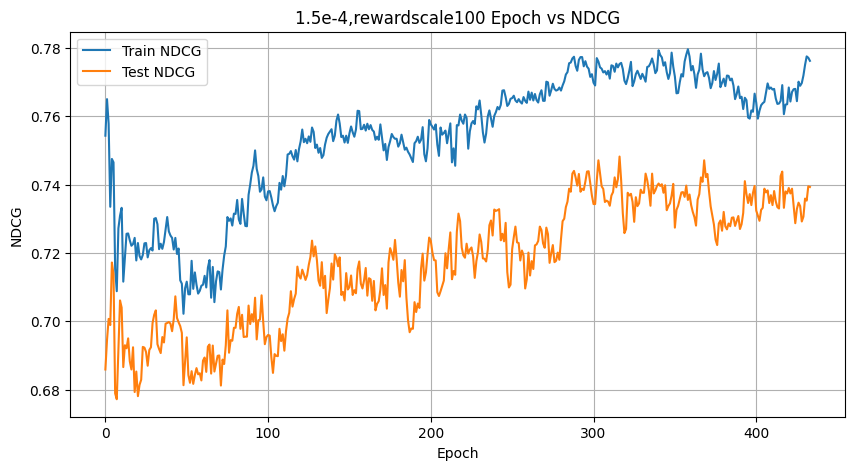

In [13]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rewardscale100.e74184'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4,rewardscale100')

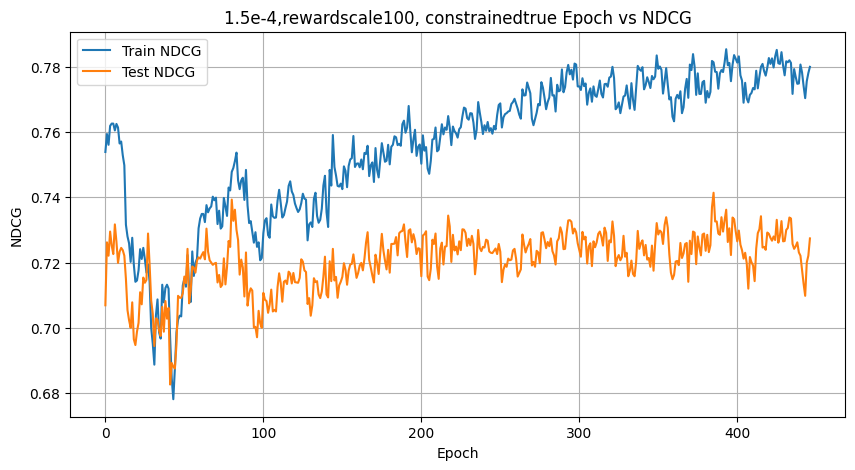

In [17]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constrainedtrue.e74299'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4,rewardscale100, constrainedtrue')

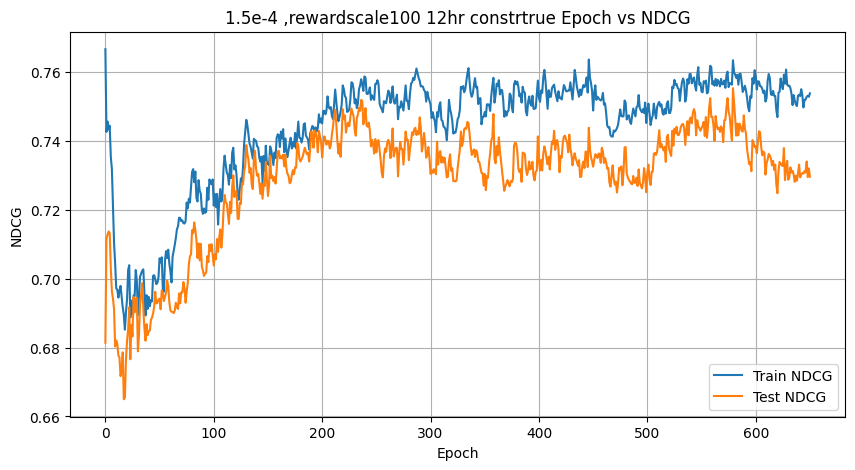

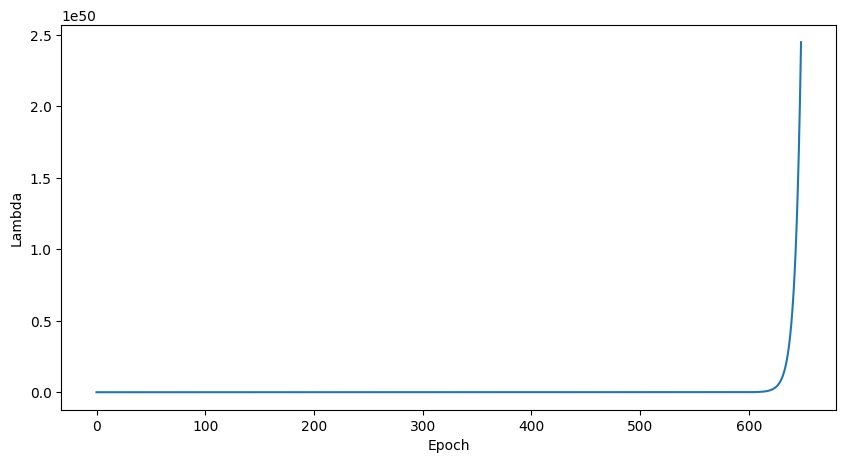

In [46]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_12hr_constrtrue.e74342'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr constrtrue')

#this has a constantly increasing lambda value

lambdas, pens = parse_lambda('plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_12hr_constrtrue.o74342')
plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)


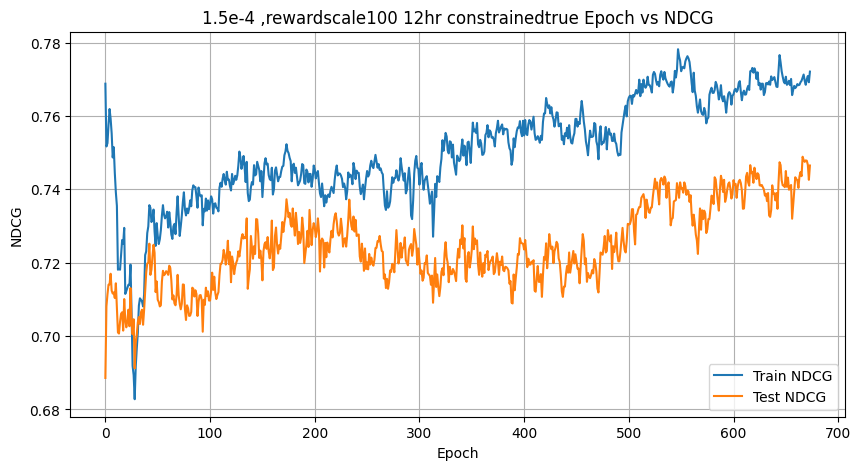

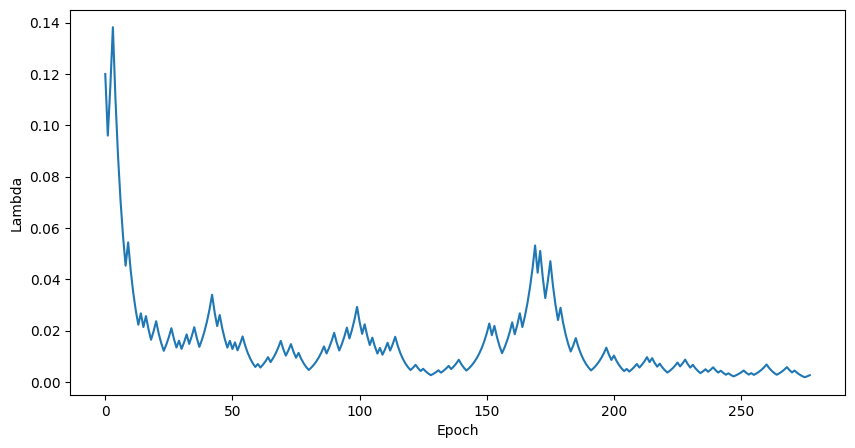

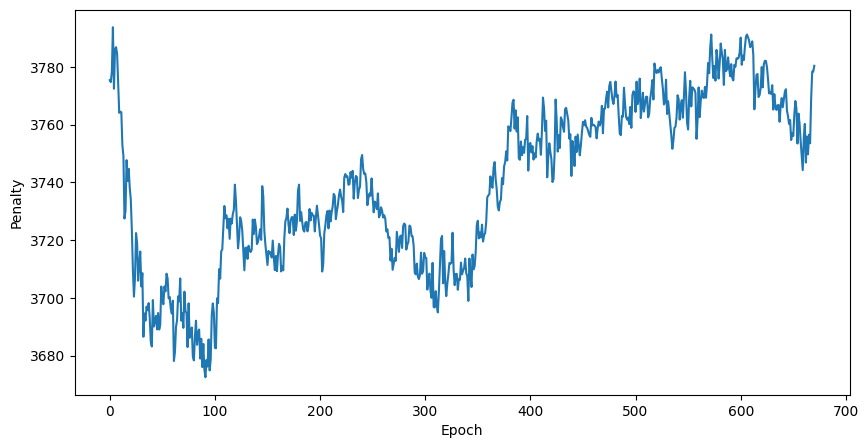

In [47]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constrainedtrue_12hr.e74399'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr constrainedtrue')

# # lambda was adjusting properly here. was lambda=0.1 initial though, so severities not as low as above - above also has higher ndcg 

lambdas, pens = parse_lambda('plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constrainedtrue_12hr.o74399')
plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)

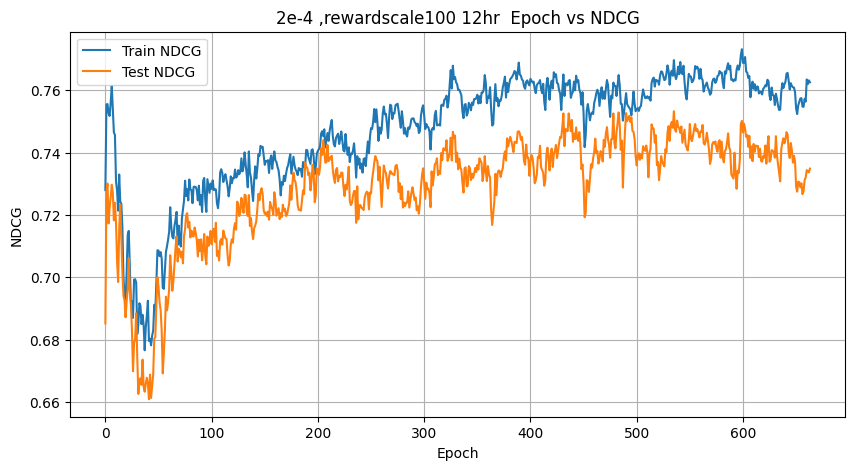

In [9]:
file_path = 'plot_files/PPORank_FYP_lr2e-4_15xlrsched_epochs700_rwdscl100_12hr.e74625'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '2e-4 ,rewardscale100 12hr ')



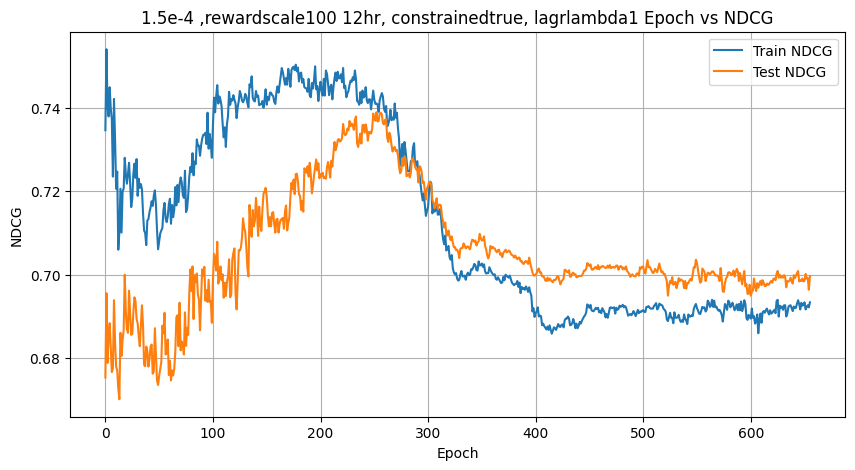

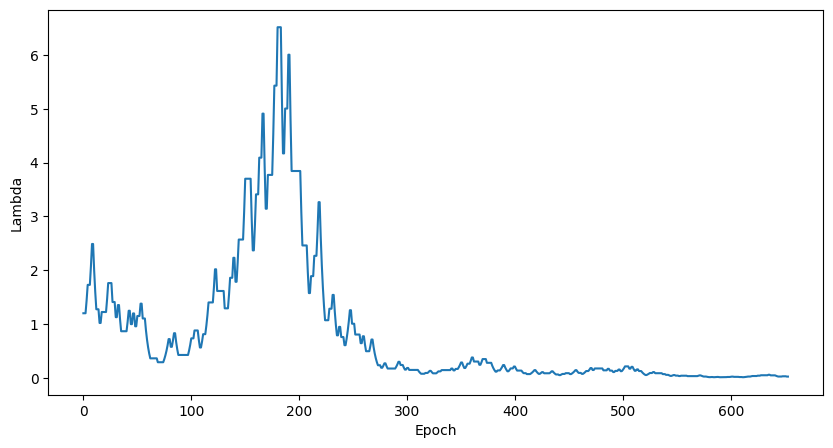

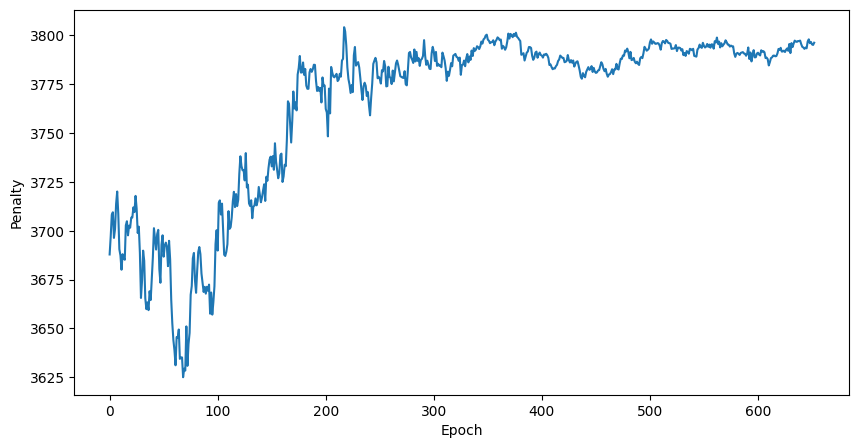

In [42]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_12hr_constrainedtrue_lagrlambda1.e74948'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue, lagrlambda1')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_12hr_constrainedtrue_lagrlambda1.o74948'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)

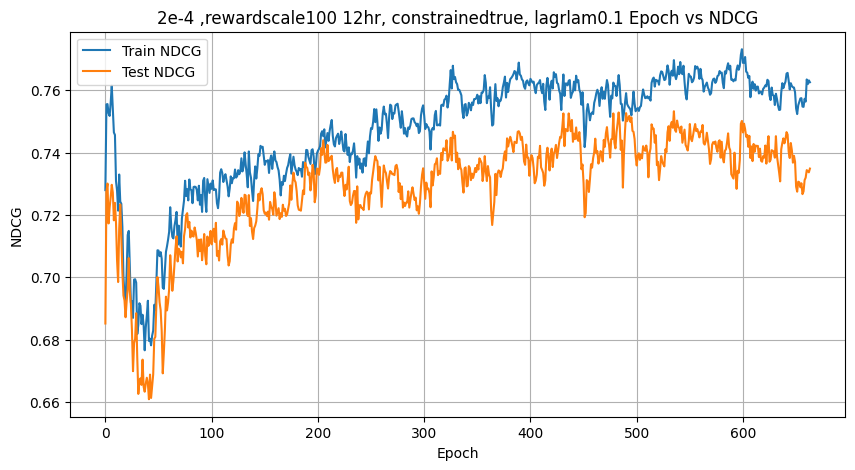

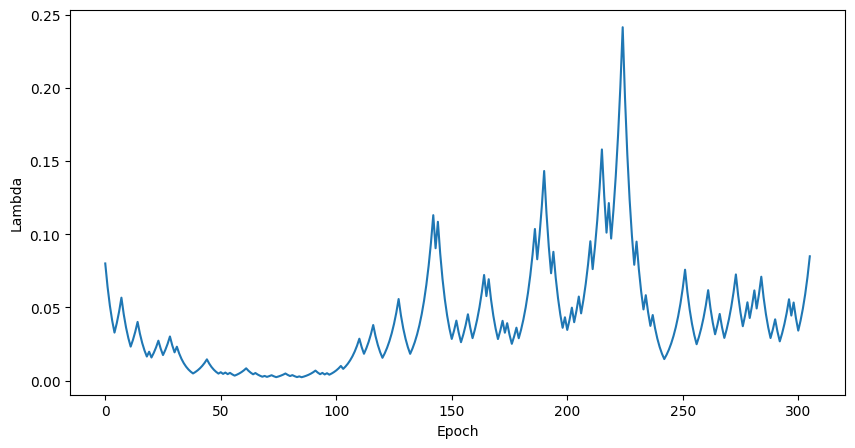

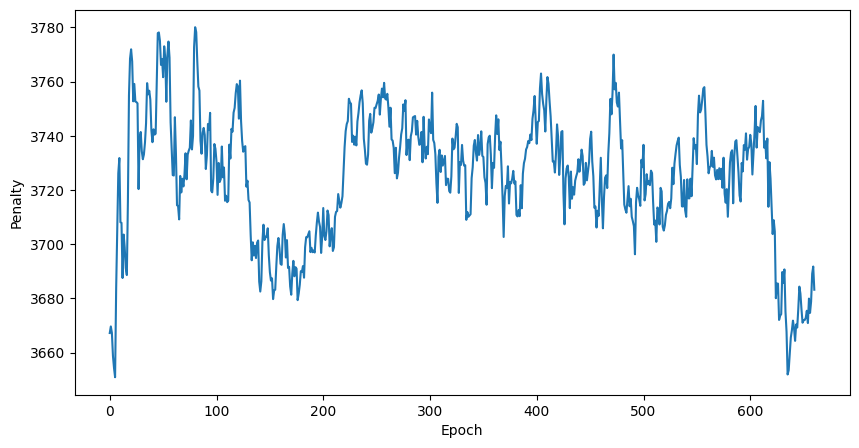

In [53]:
file_path = 'plot_files/PPORank_FYP_lr2e-4_15xlrsched_epochs700_rwdscl100_12hr_constrtrue_lagrlam0.1.e74625'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '2e-4 ,rewardscale100 12hr, constrainedtrue, lagrlam0.1')

lamb_path = 'plot_files/PPORank_FYP_lr2e-4_15xlrsched_epochs700_rwdscl100_12hr_constrtrue_lagrlam0.1.o74625'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)

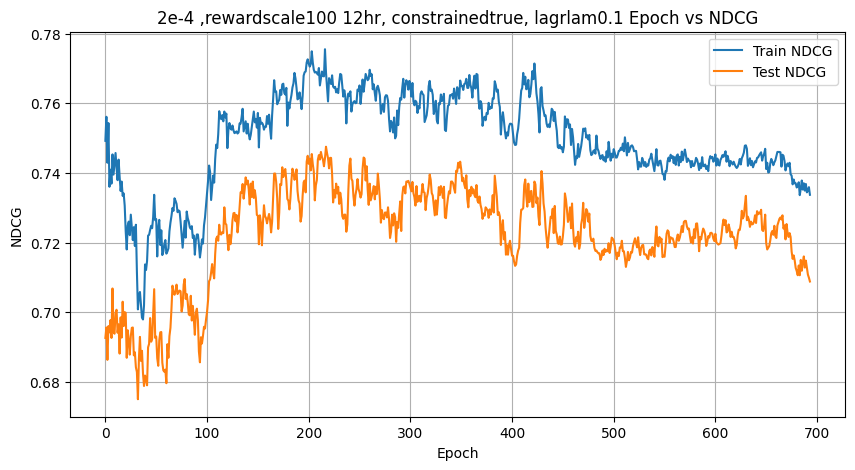

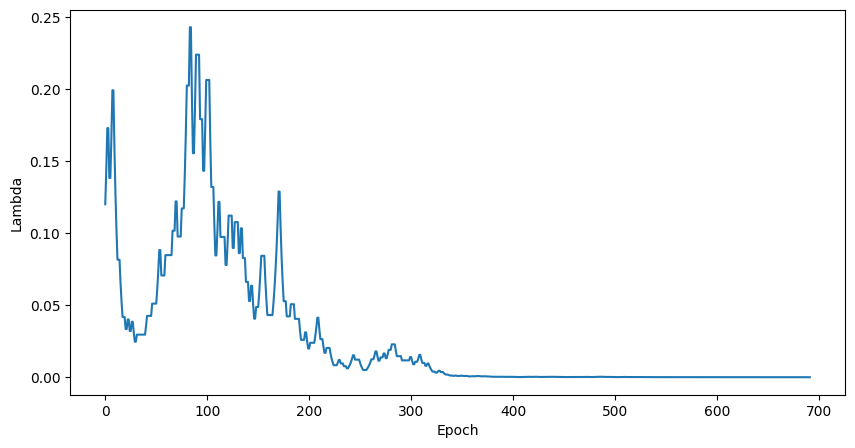

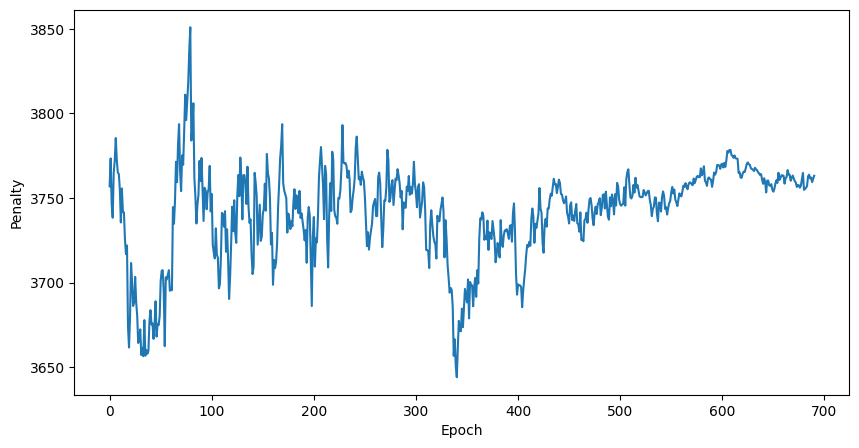

In [54]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_12hr_constrtrue.e75254'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '2e-4 ,rewardscale100 12hr, constrainedtrue, lagrlam0.1')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_12hr_constrtrue.o75254'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)



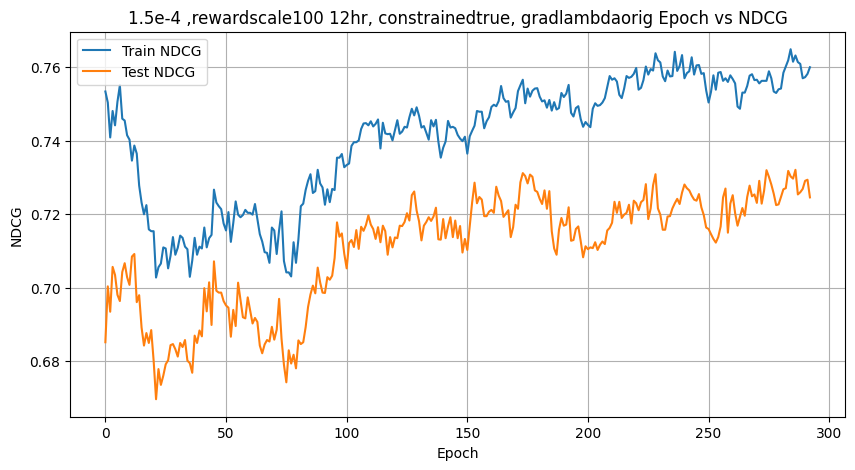

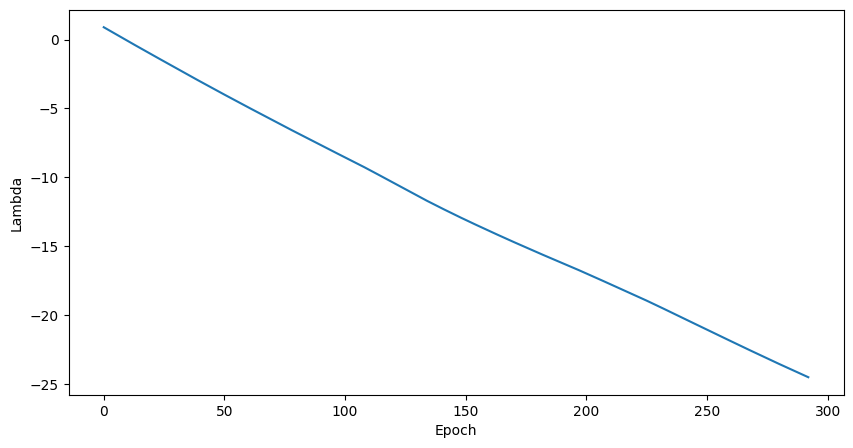

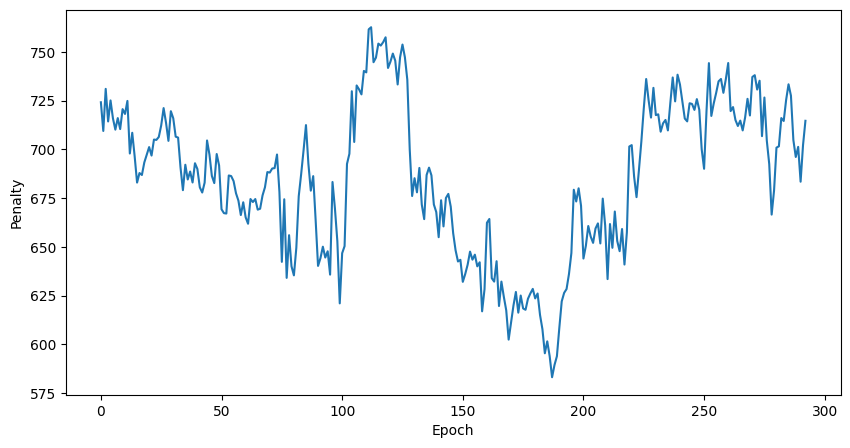

In [6]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constrtrue_gradlambdaorig.e75598'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue, gradlambdaorig')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constrtrue_gradlambdaorig.o75598'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)



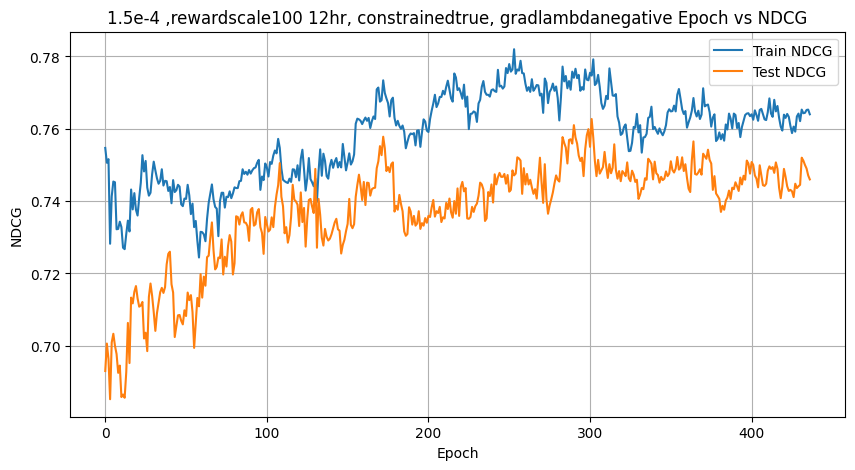

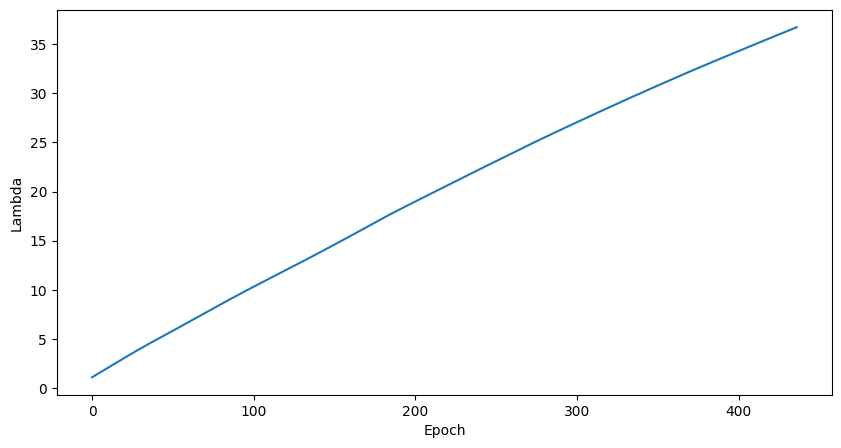

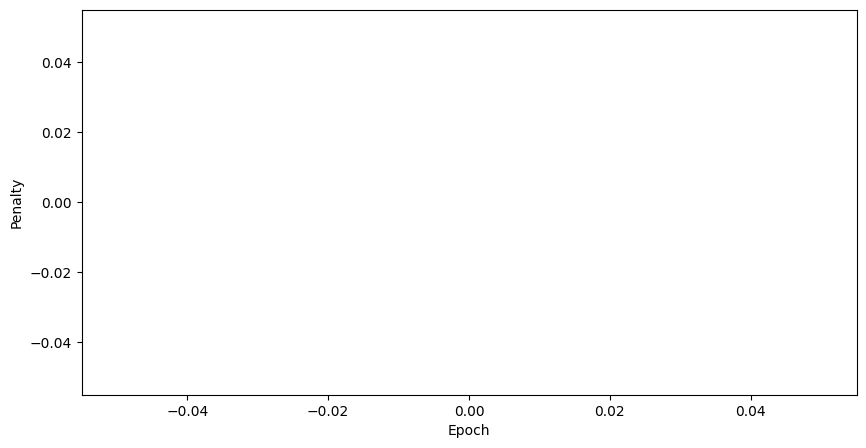

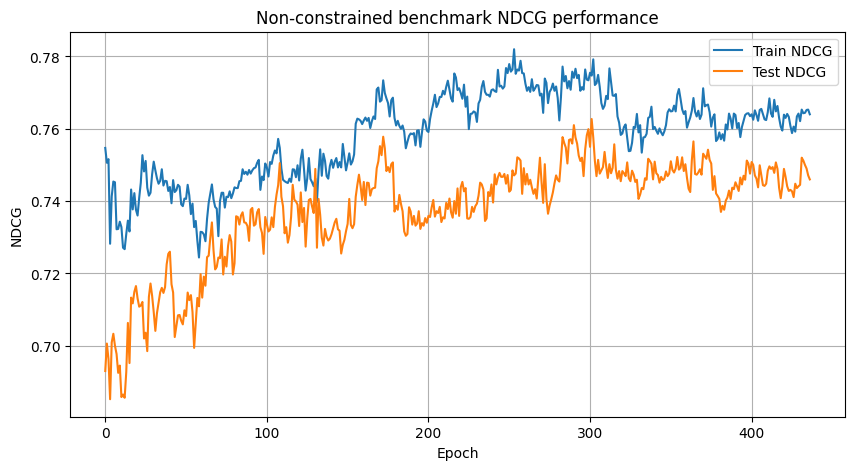

In [46]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constrtrue_gradlambdanegative.e75704'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue, gradlambdanegative')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constrtrue_gradlambdanegative.o75704'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)




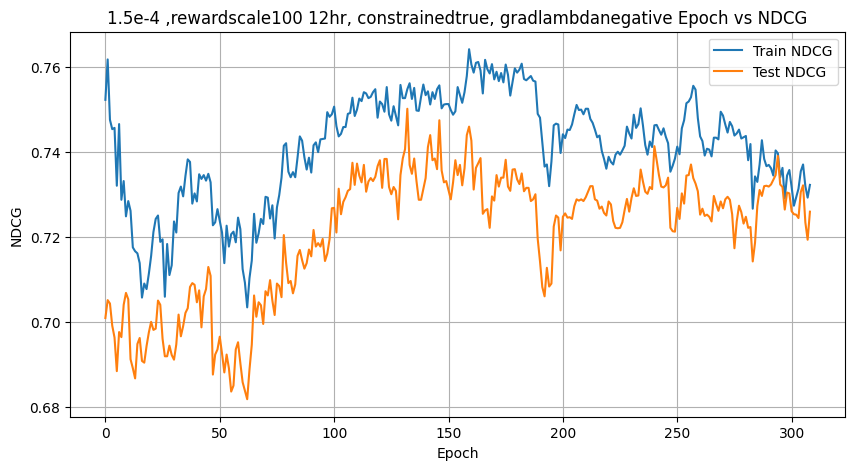

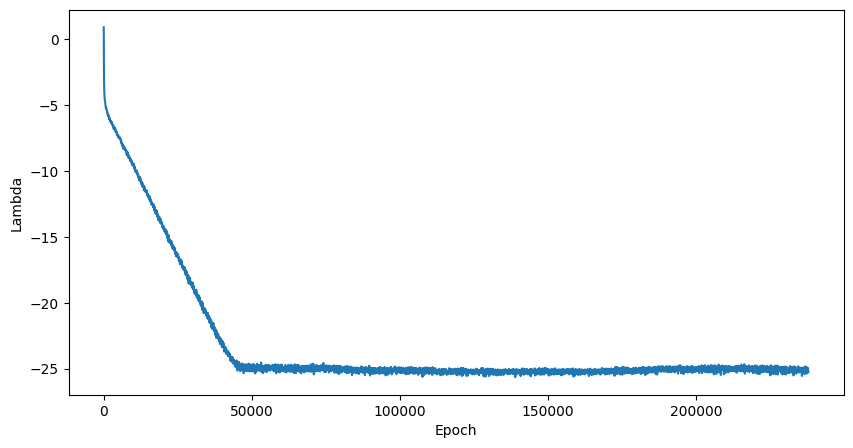

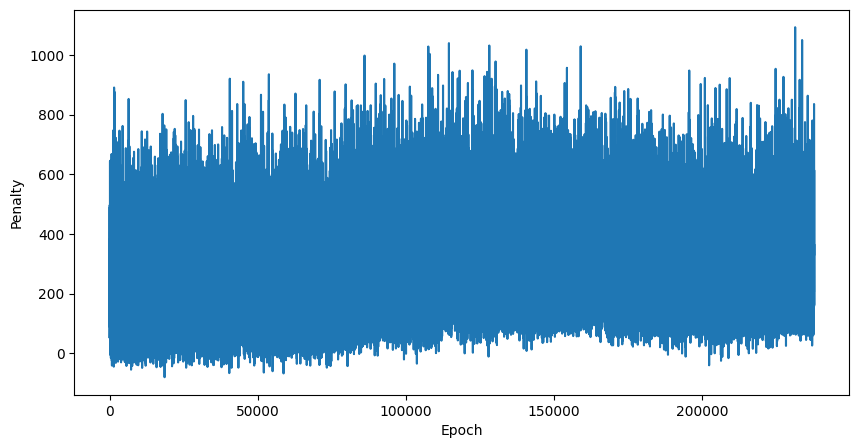

In [24]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminupdate_alladds.e76243'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue, gradlambdanegative')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminupdate_alladds.o76243'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)





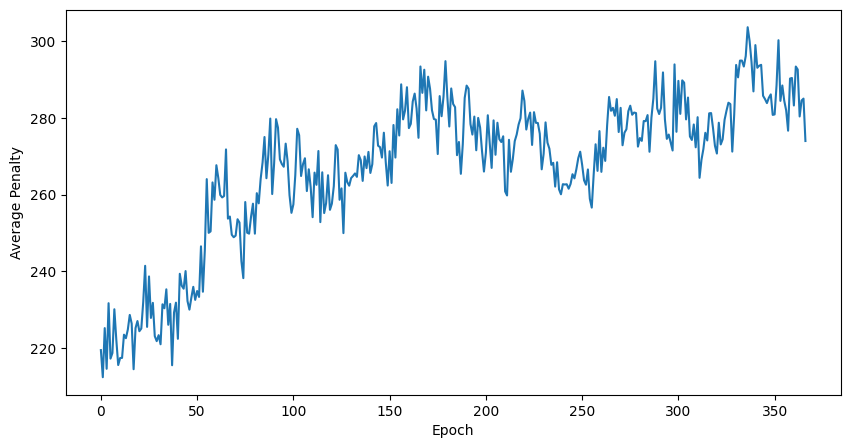

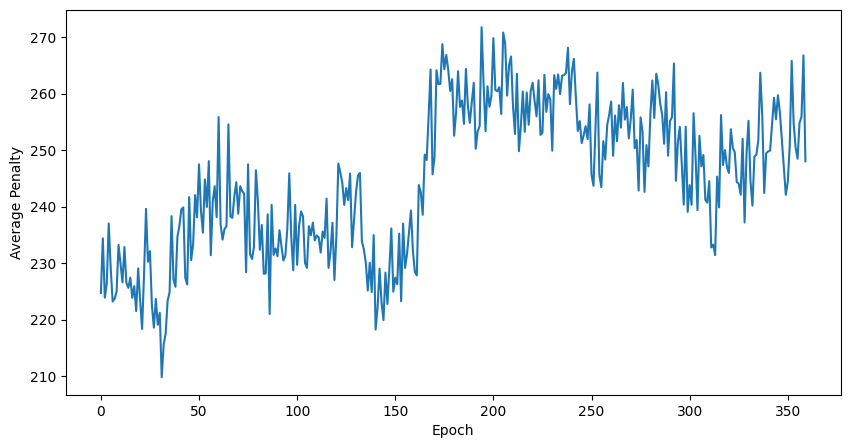

In [28]:
avg_pen_vio = extract_avg_pen_vio('plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminupdate_pluspen.o9471767')
plt.figure(figsize=(10, 5))
plt.ylabel('Average Penalty')
plt.xlabel('Epoch')
plt.plot(avg_pen_vio)

avg_pen_vio = extract_avg_pen_vio('plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminupdate_minuspen.o9471784')
plt.figure(figsize=(10, 5))
plt.ylabel('Average Penalty')
plt.xlabel('Epoch')
plt.plot(avg_pen_vio)



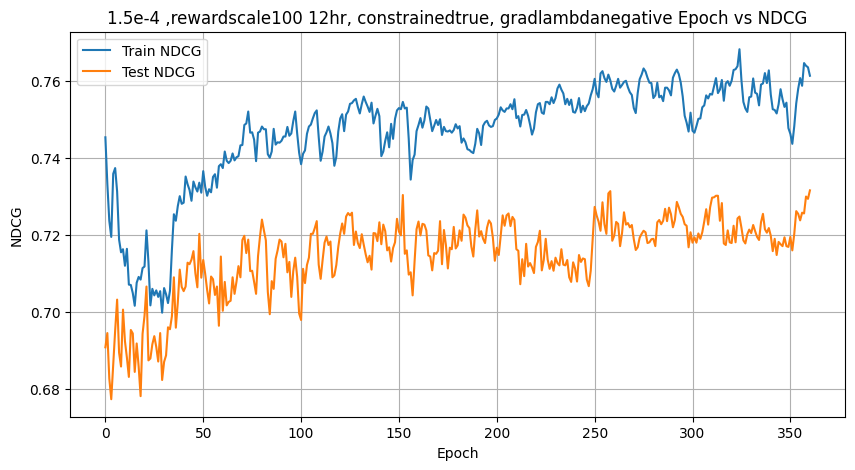

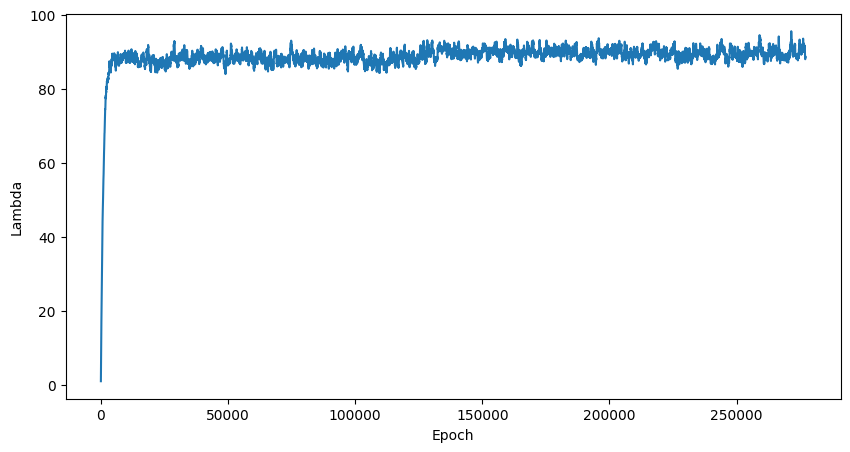

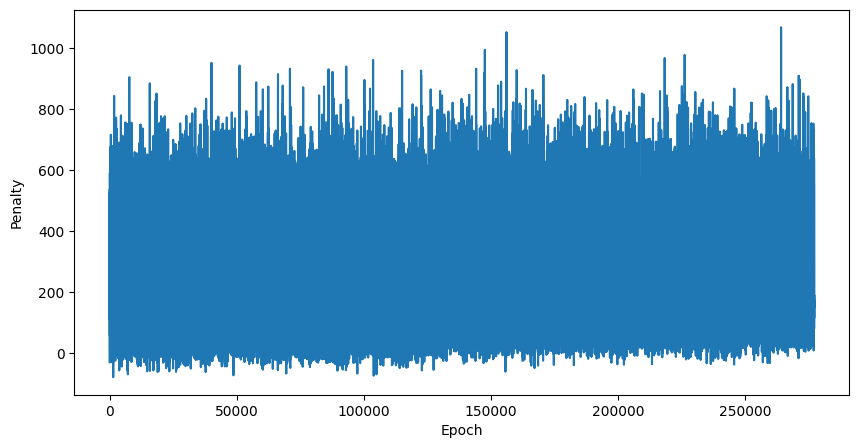

In [29]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminupdate_minuspen.e9471784'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue, gradlambdanegative')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminupdate_minuspen.o9471784'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)





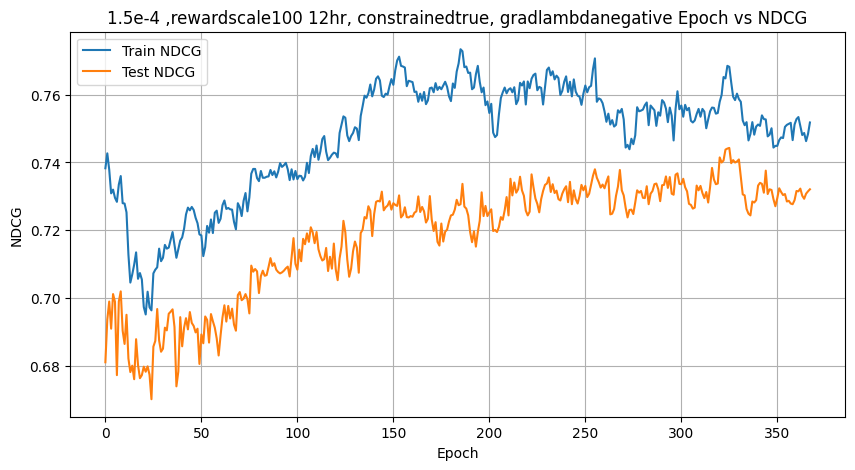

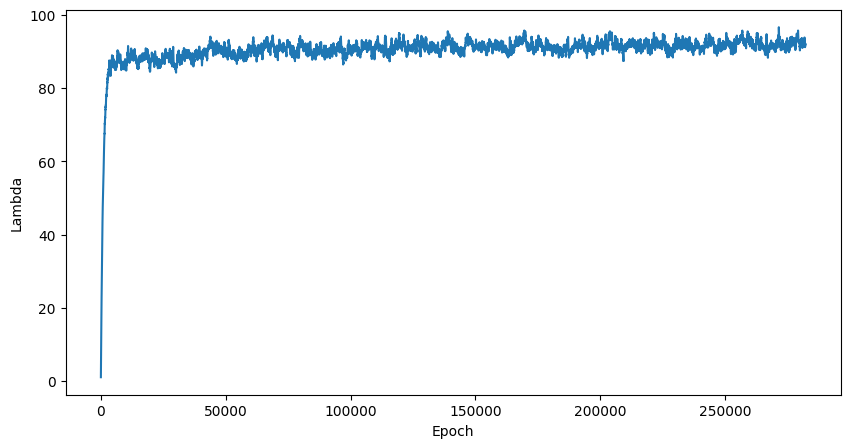

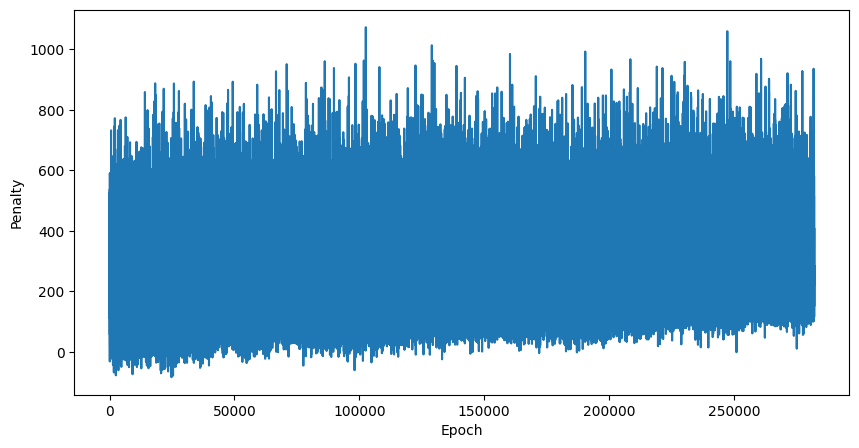

In [30]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminupdate_pluspen.e9471767'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue, gradlambdanegative')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminupdate_pluspen.o9471767'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)






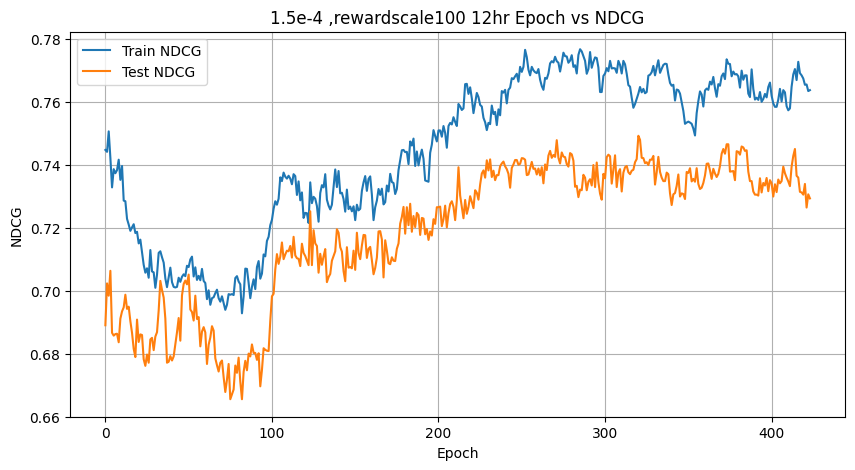

In [38]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_12hr.e75146'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr')



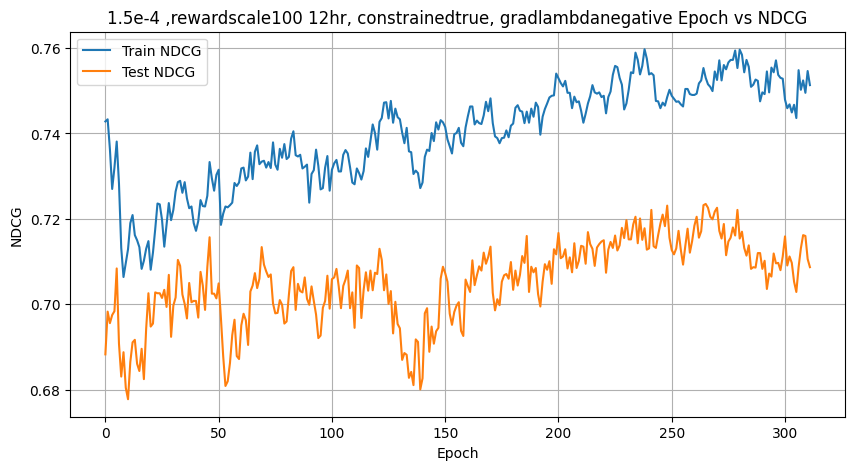

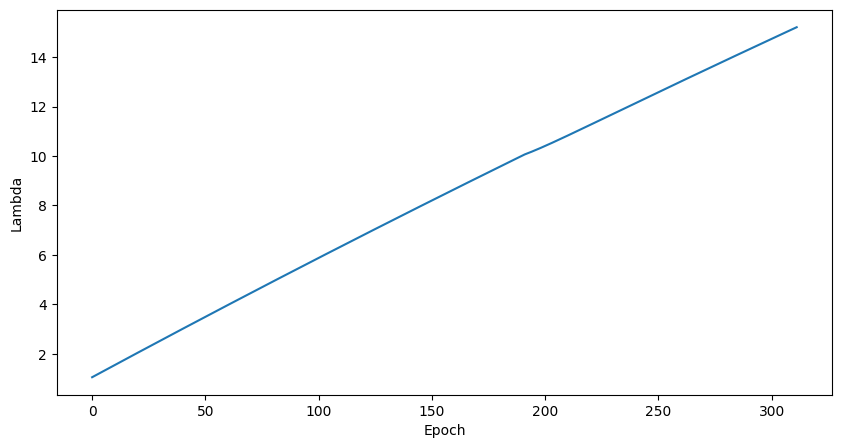

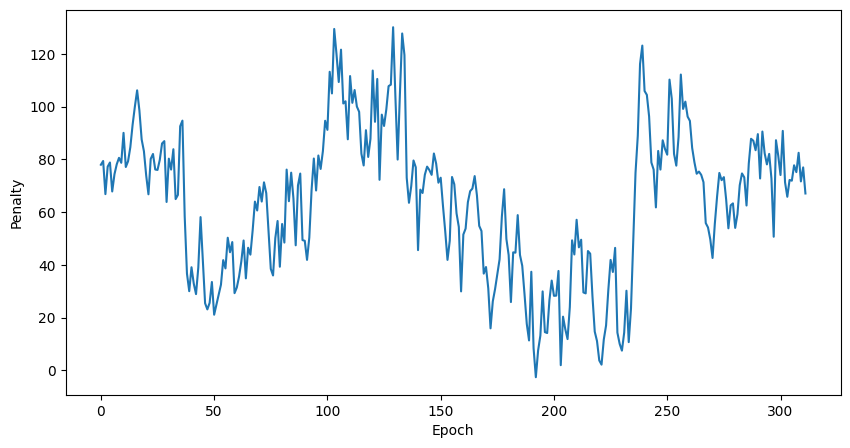

In [39]:
# lambda update in eval, loss_pen = -lagrange_multiplier * pen_violation

file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminval_objfuncadd_losspenneg.e76992'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue, gradlambdanegative')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminval_objfuncadd_losspenneg.o76992'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)


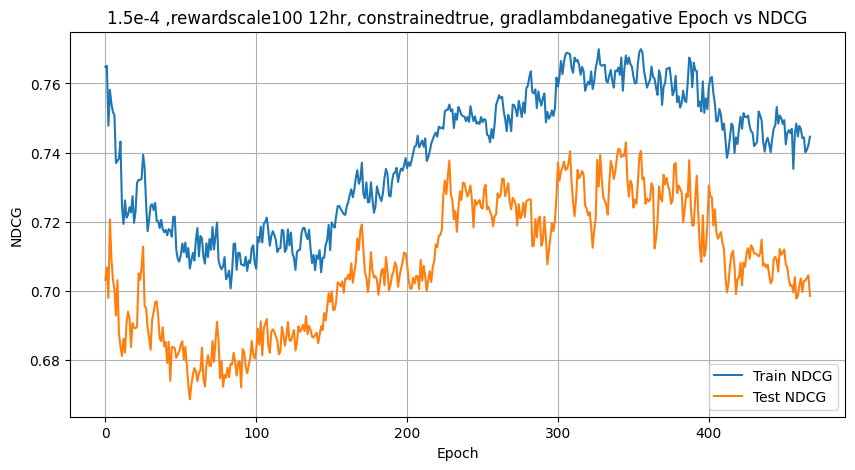

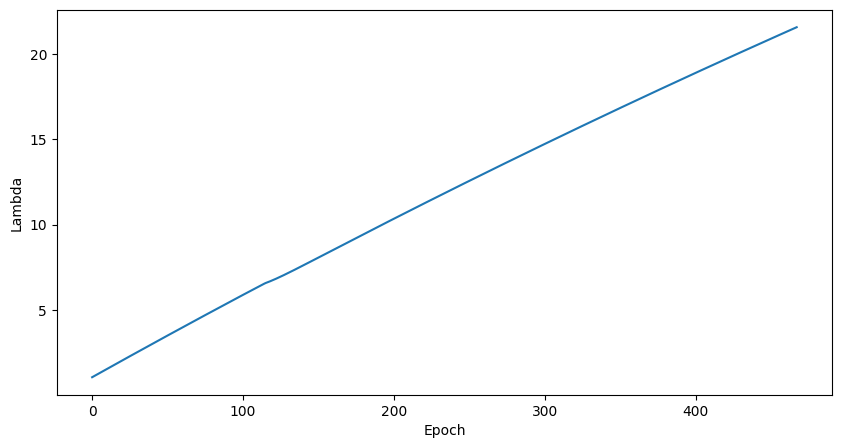

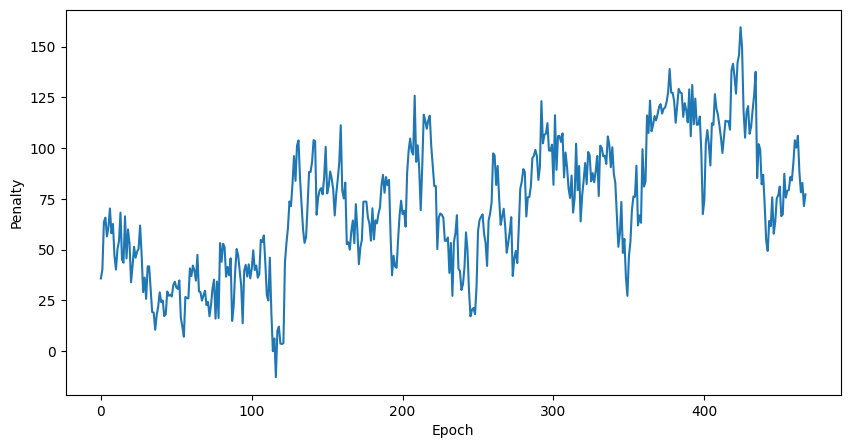

In [40]:
# lambda update in eval, loss_pen = -lagrange_multiplier * pen_violation

file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminval_objfuncadd_losspenpos.e76993'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue, gradlambdanegative')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_constr_laminval_objfuncadd_losspenpos.o76993'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)




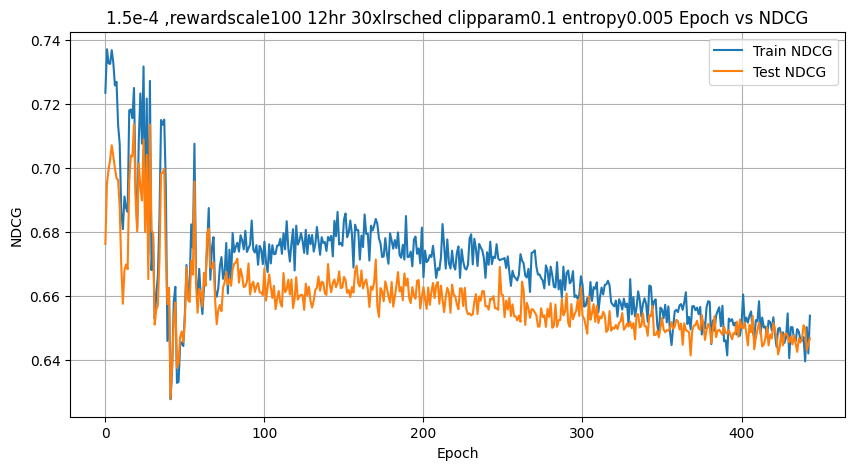

In [7]:
# lambda update in eval, loss_pen = -lagrange_multiplier * pen_violation

file_path = 'plot_files/PPORank_FYP_lr1.5e-4_30xlrsched_epochs700_rwdscl100_clipparam0.1_entropy0.005.e77036'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr 30xlrsched clipparam0.1 entropy0.005')


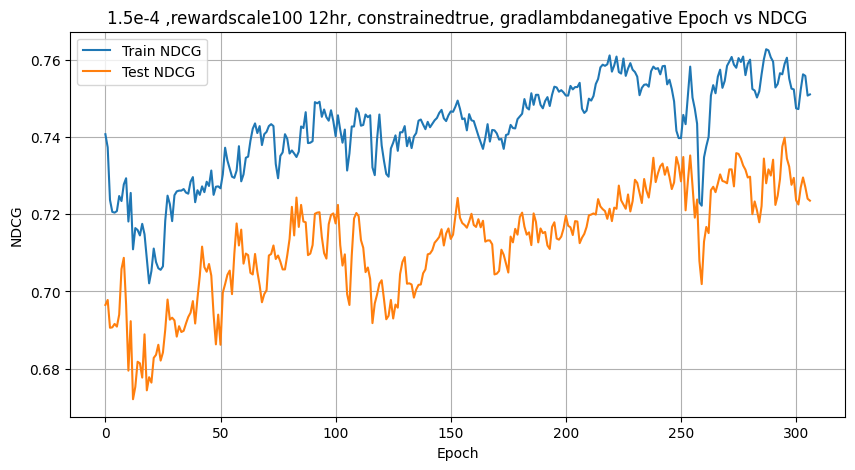

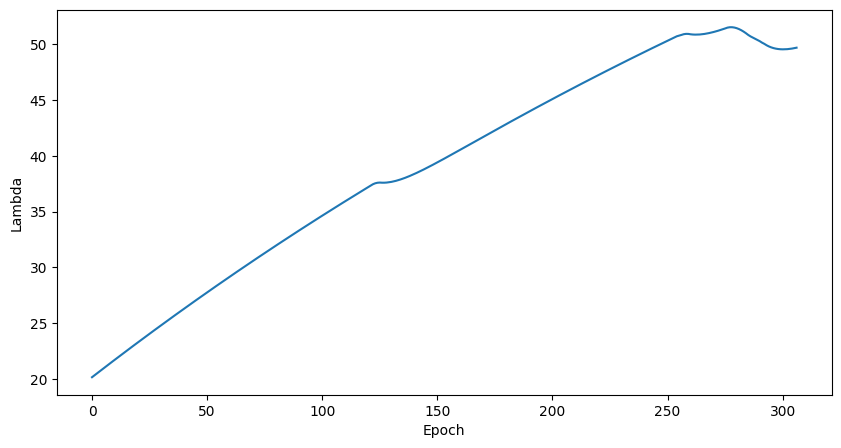

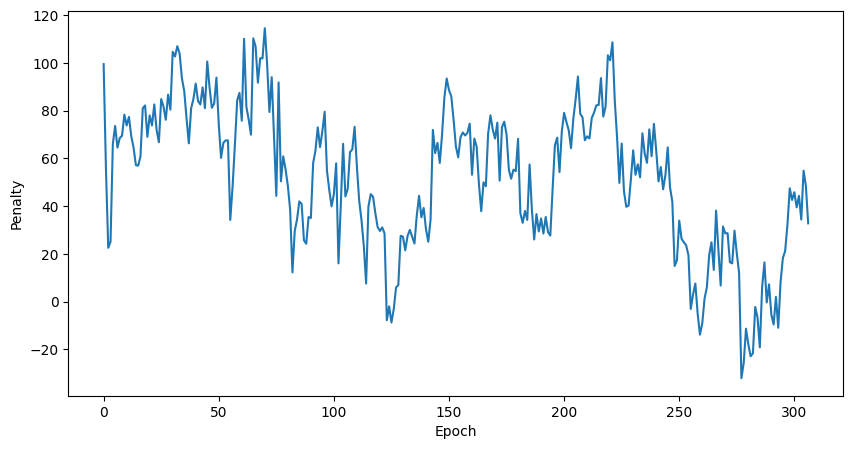

In [21]:
# lambda update in eval, loss_pen = -lagrange_multiplier * pen_violation

file_path = 'plot_files/PPORank_FYP_lr1.7e-4_30xlrsched_epochs700_constrtrue_lagrlambda20_lambdalr0.2.e77159'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue, gradlambdanegative')

lamb_path = 'plot_files/PPORank_FYP_lr1.7e-4_30xlrsched_epochs700_constrtrue_lagrlambda20_lambdalr0.2.o77159'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)


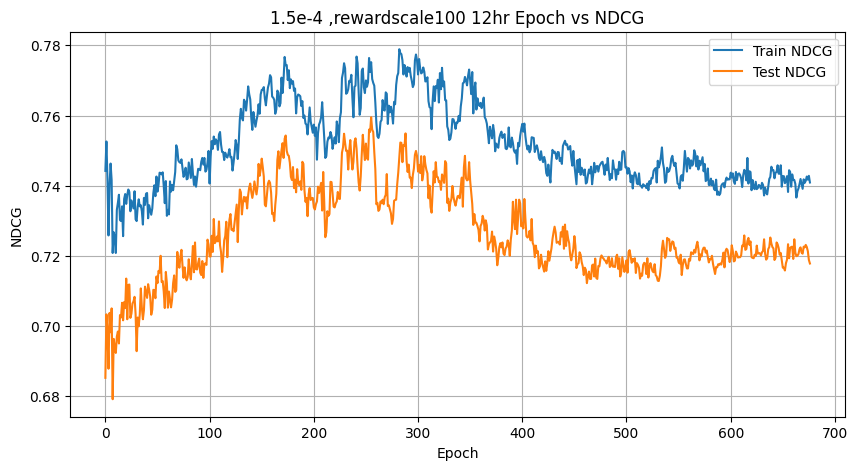

In [39]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100.e76029'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr')



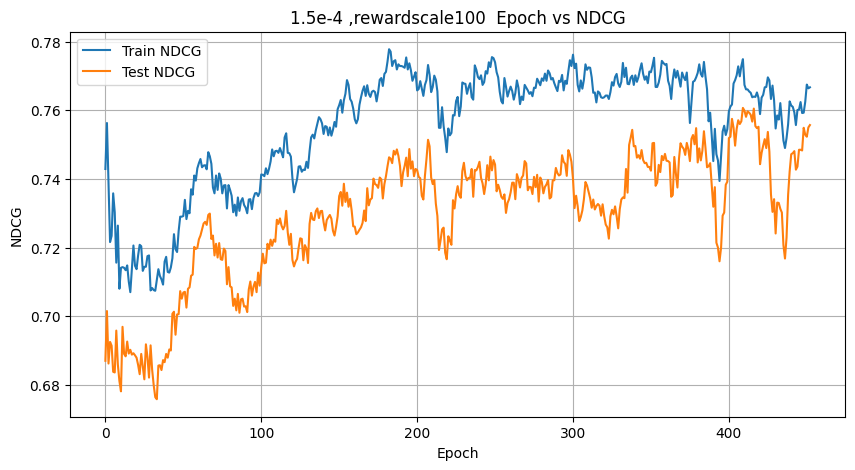

In [37]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100.e75847'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 ')



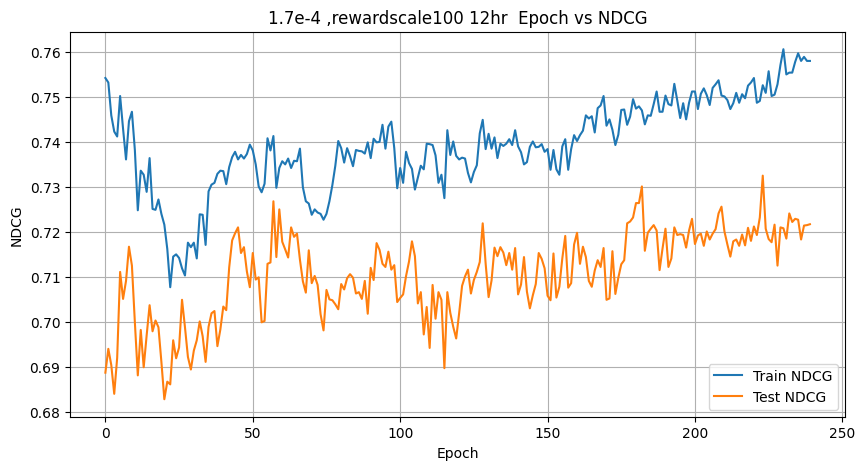

In [40]:
file_path = 'plot_files/test.txt'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.7e-4 ,rewardscale100 12hr ')



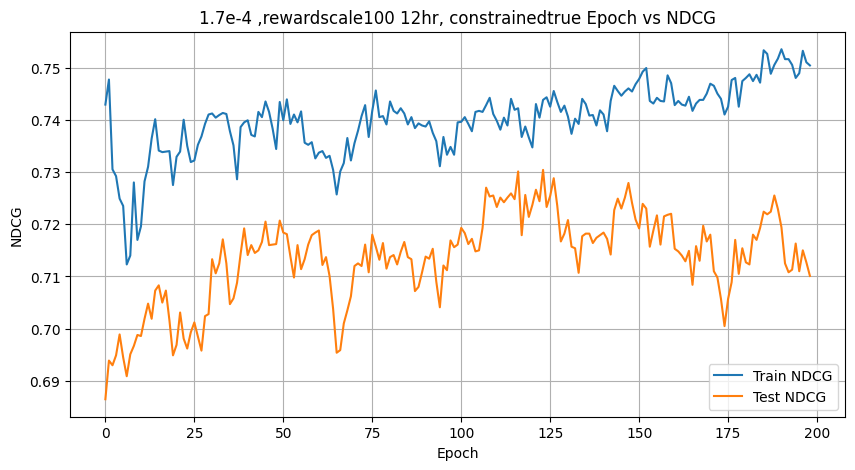

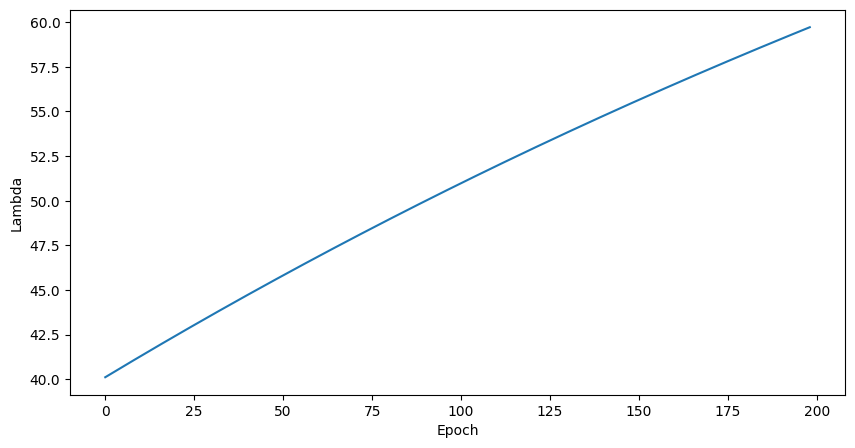

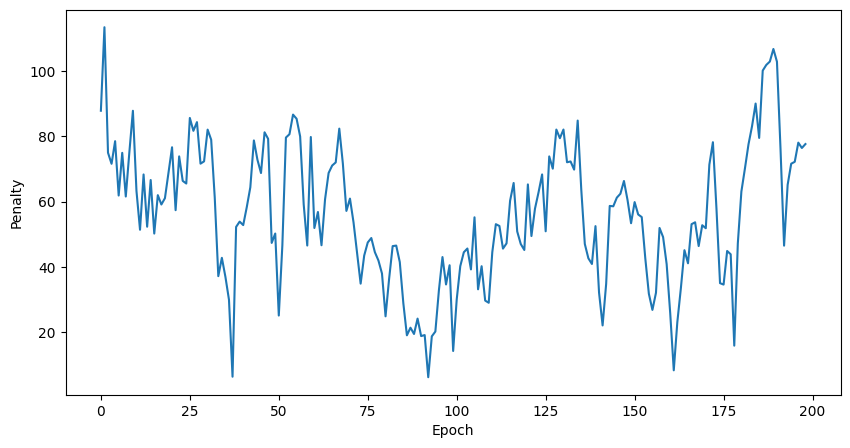

In [5]:
# lambda update in eval, loss_pen = -lagrange_multiplier * pen_violation

file_path = 'plot_files/PPORank_FYP_lr1.7e-4_30xlrsched_epochs700_constrtrue_lagrlambda40_lambdalr0.2.e77310'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.7e-4 ,rewardscale100 12hr, constrainedtrue')

lamb_path = 'plot_files/PPORank_FYP_lr1.7e-4_30xlrsched_epochs700_constrtrue_lagrlambda40_lambdalr0.2.o77310'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)




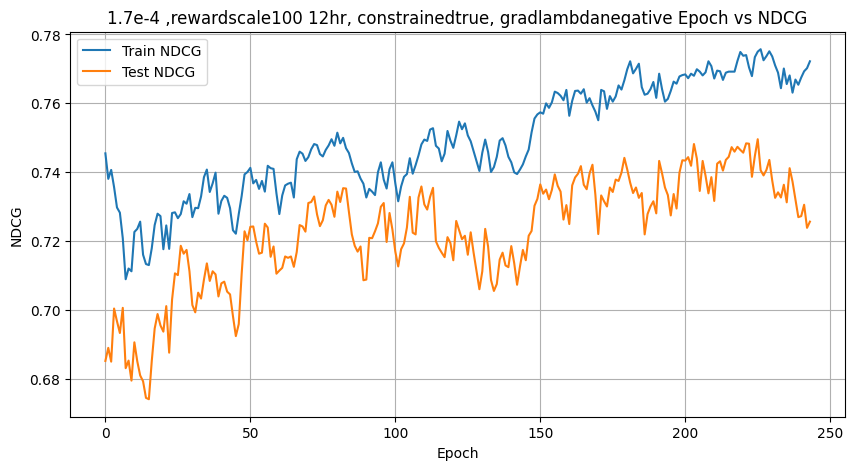

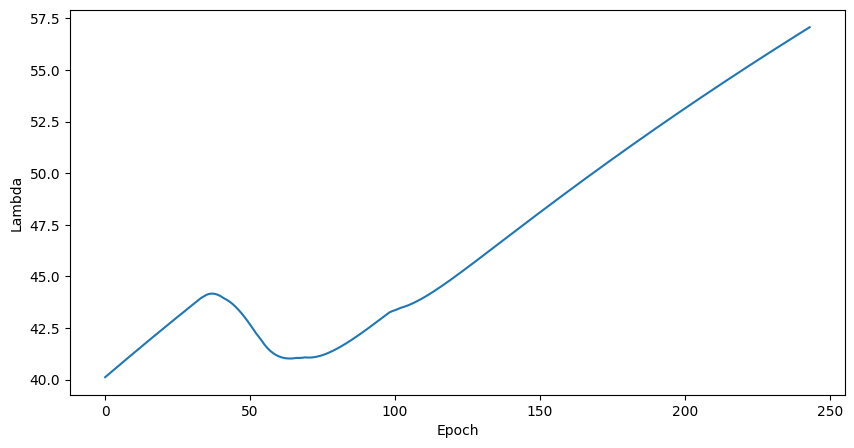

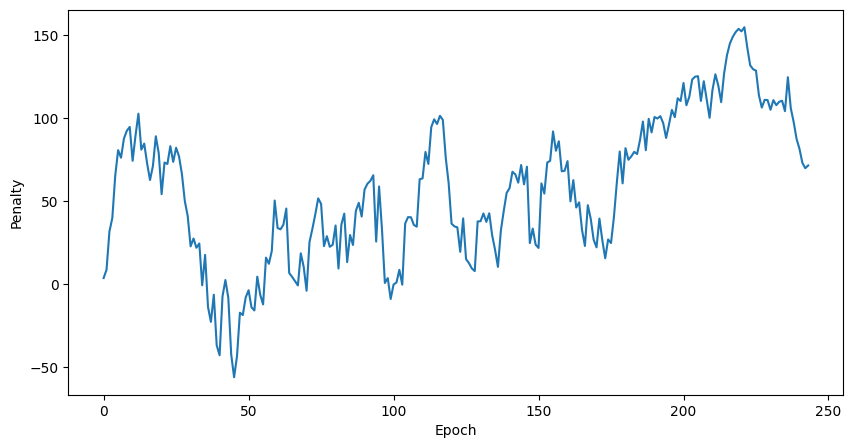

In [6]:
# lambda update in eval, loss_pen = -lagrange_multiplier * pen_violation

file_path = 'plot_files/PPORank_FYP_lr1.7e-4_30xlrsched_epochs700_constrtrue_lagrlambda40_lambdalr0.2.e9485143'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.7e-4 ,rewardscale100 12hr, constrainedtrue, gradlambdanegative')

lamb_path = 'plot_files/PPORank_FYP_lr1.7e-4_30xlrsched_epochs700_constrtrue_lagrlambda40_lambdalr0.2.o9485143'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)






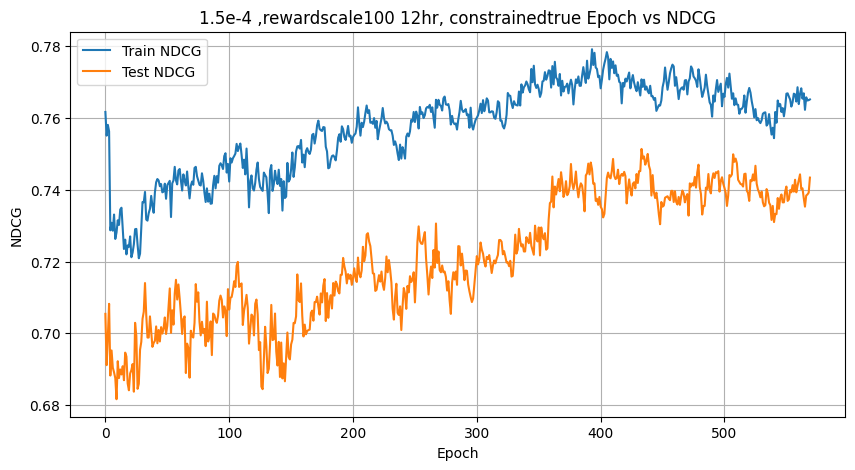

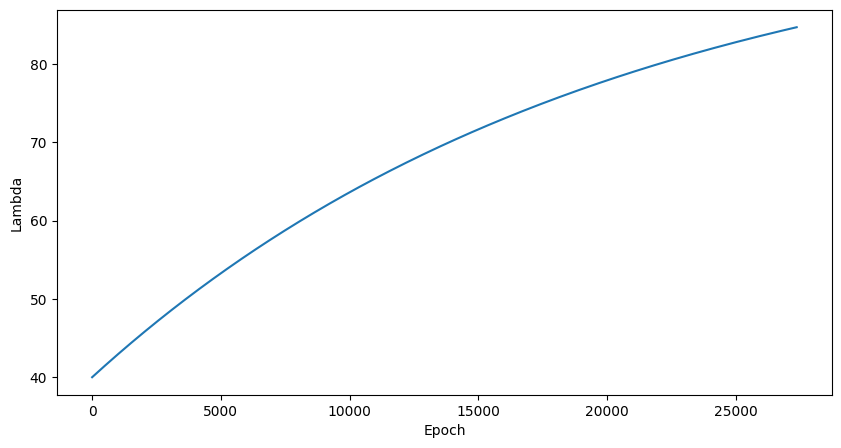

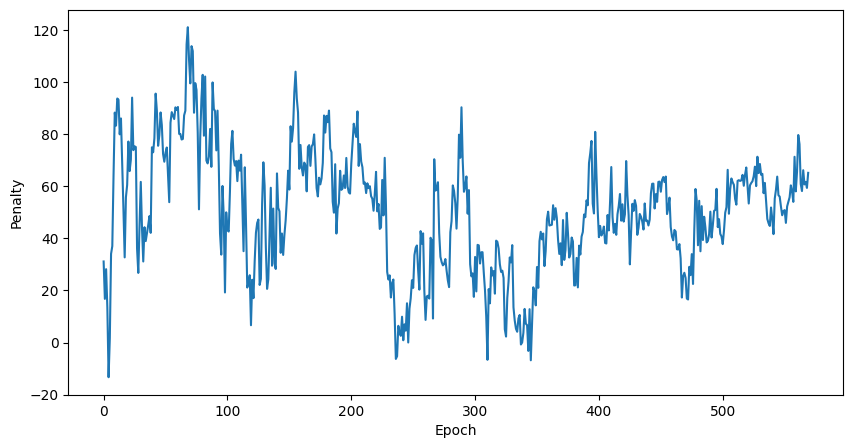

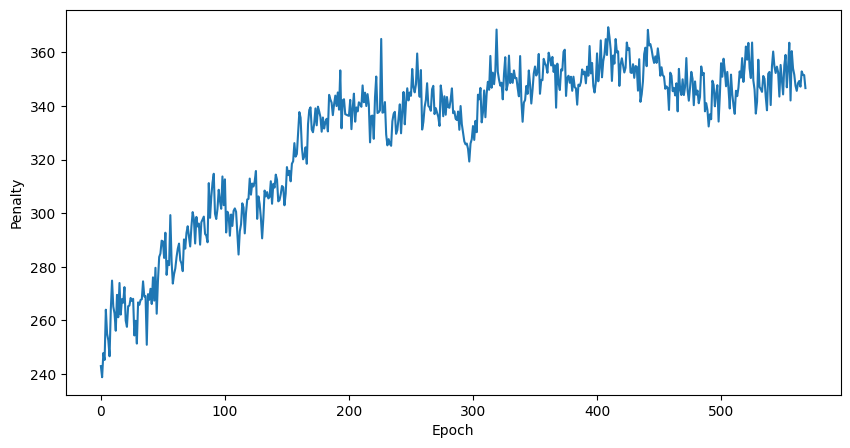

In [41]:
# --lr=1.5e-4 --reward_scale_factor=100 --constrained=True --lagrange_lambda=40 --lambda_lr=0.005

file_path = 'plot_files/PPORank_FYP_lr1.5e-4_constr_lamb40_lamlr0.005_periodic.txt'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_constr_lamb40_lamlr0.005_periodic.txt'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)


avgvio = extract_avg_pen_vio(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(avgvio)




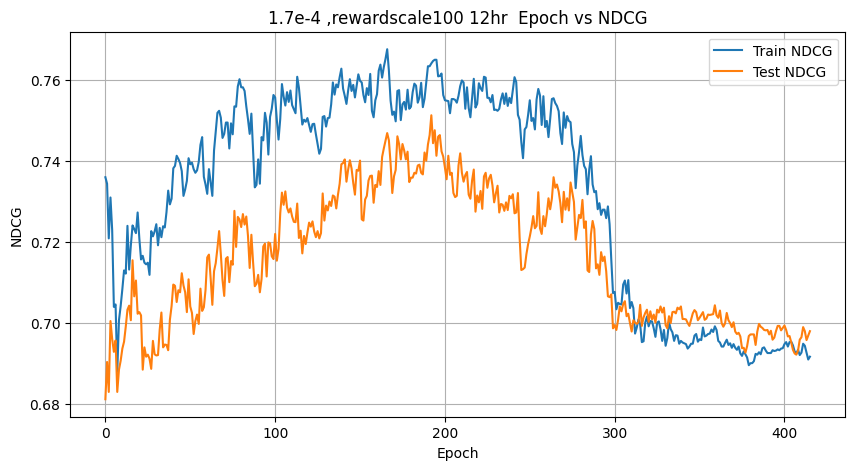

In [36]:
file_path = 'plot_files/PPORank_FYP_lr1.7e-4_15xlrsched_epochs700_26thmay.e77504'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.7e-4 ,rewardscale100 12hr ')



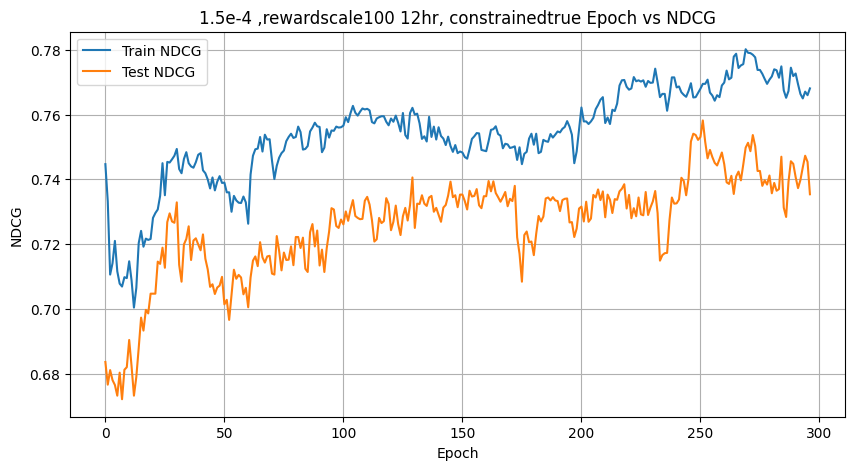

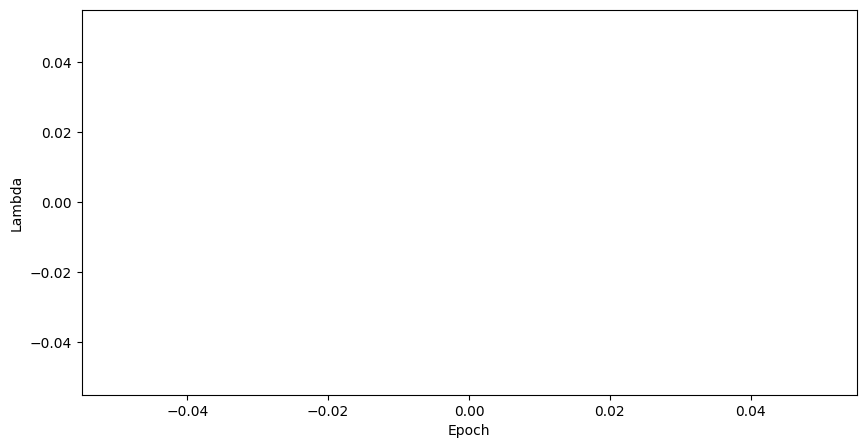

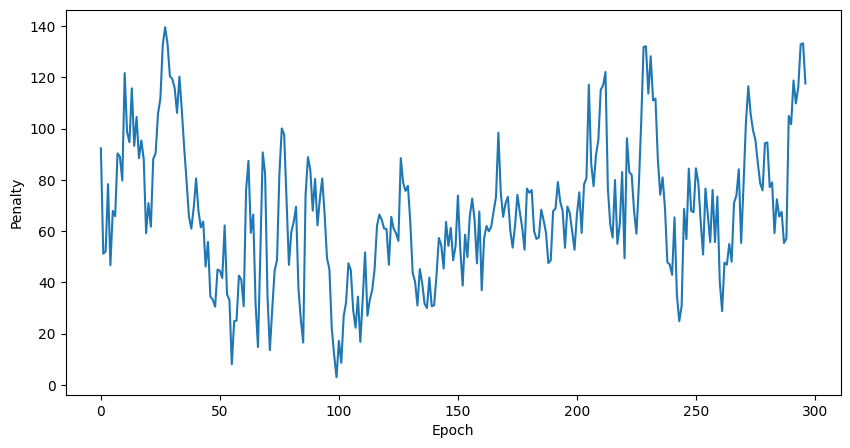

In [42]:
file_path = 'plot_files/PPORank_FYP_lr1.7e-4_15xlrsched_epochs700_constr_quadraticloss_rho0.5.e77594'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue')

lamb_path = 'plot_files/PPORank_FYP_lr1.7e-4_15xlrsched_epochs700_constr_quadraticloss_rho0.5.o77594'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)


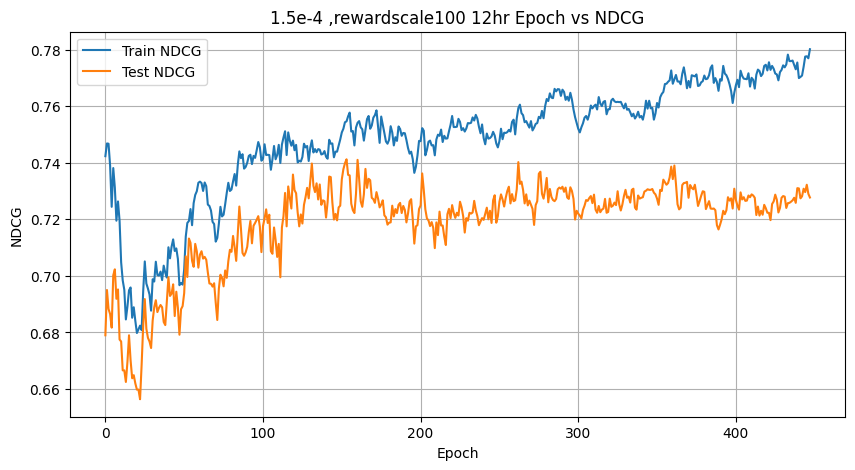

In [43]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_lrmult50_27thmay.e77649'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr')



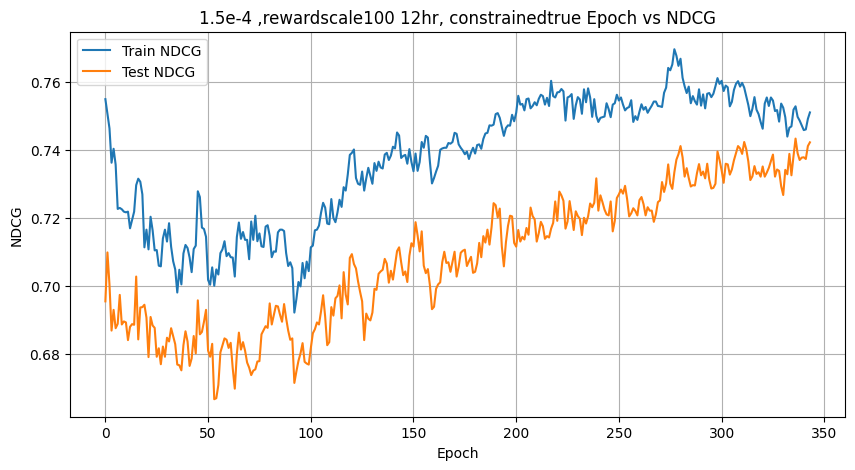

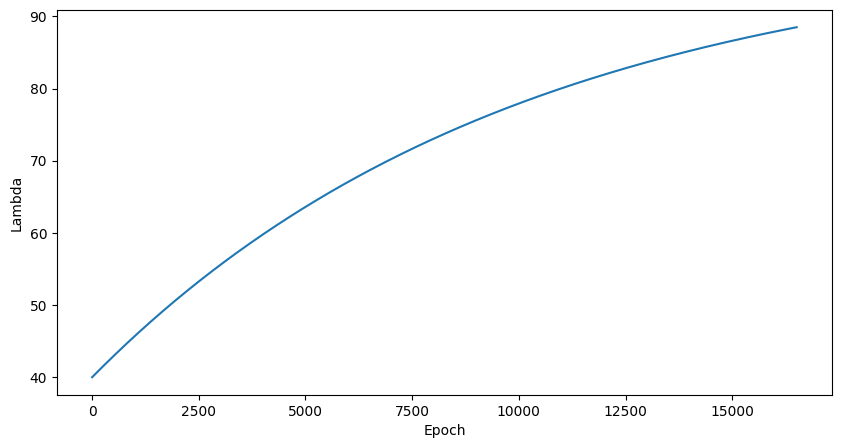

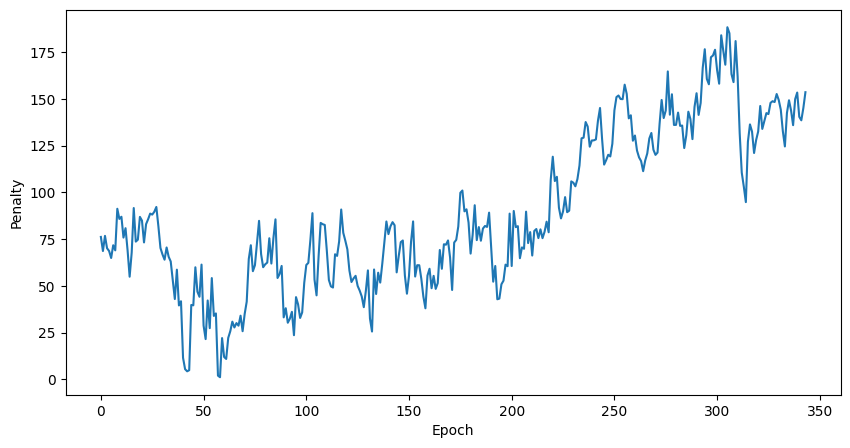

In [44]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_constr_augloss_lam40_lamlr0.01_rho0.5.e77680'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue')

lamb_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_constr_augloss_lam40_lamlr0.01_rho0.5.o77680'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)




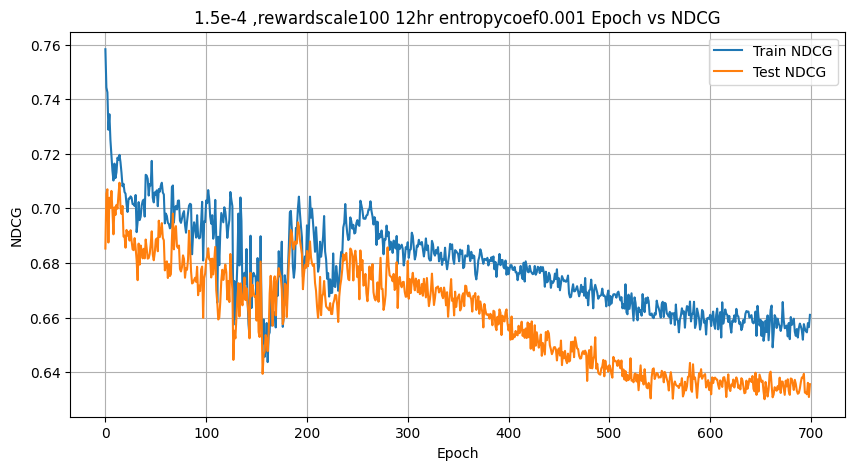

In [45]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_lrmult50_entropycoef0.001_27thmay.e77713'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr entropycoef0.001')



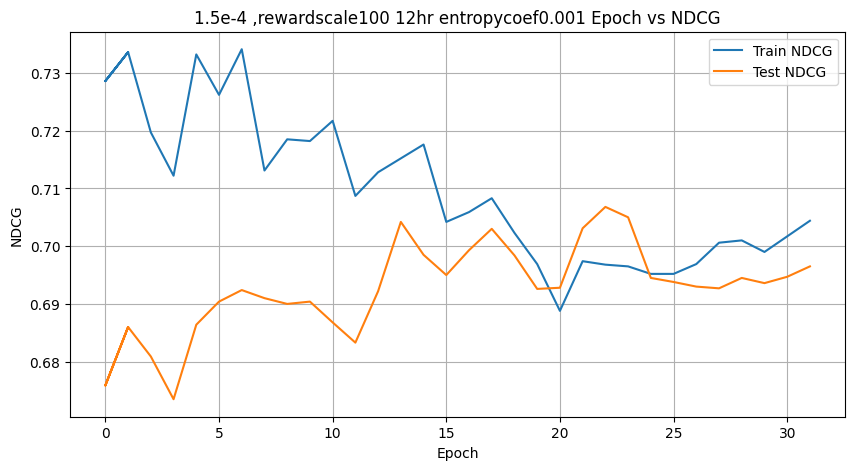

ValueError: could not convert string to float: '05<04'

In [49]:
file_path = 'plot_files/test.txt'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr entropycoef0.001')


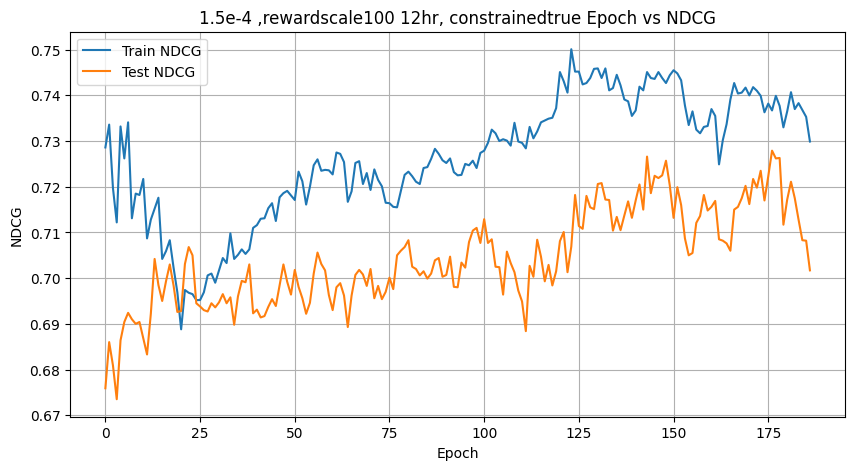

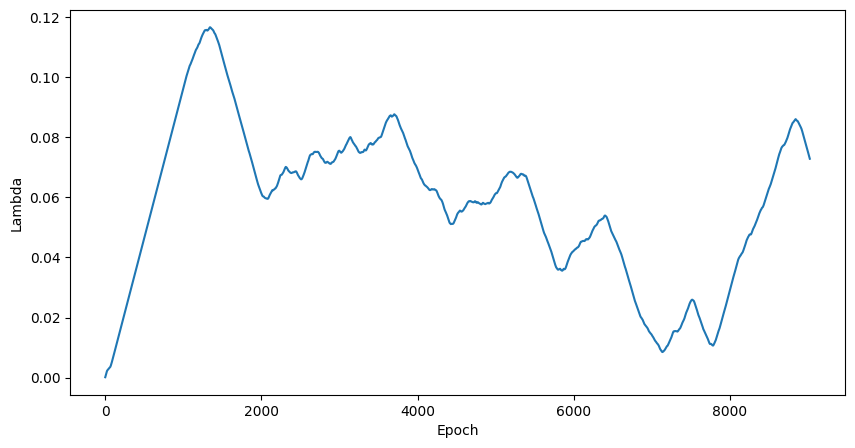

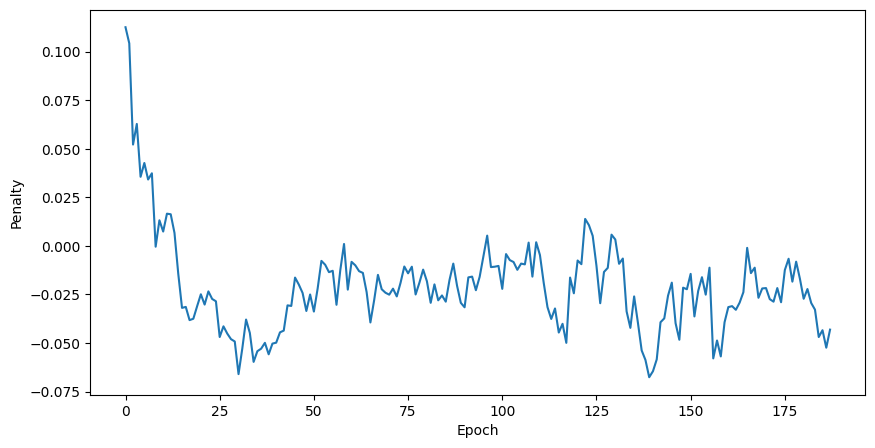

In [60]:
file_path = 'plot_files/lagrlogtimeout.txt'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue')

lamb_path = 'plot_files/lagrlogtimeout.txt'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)






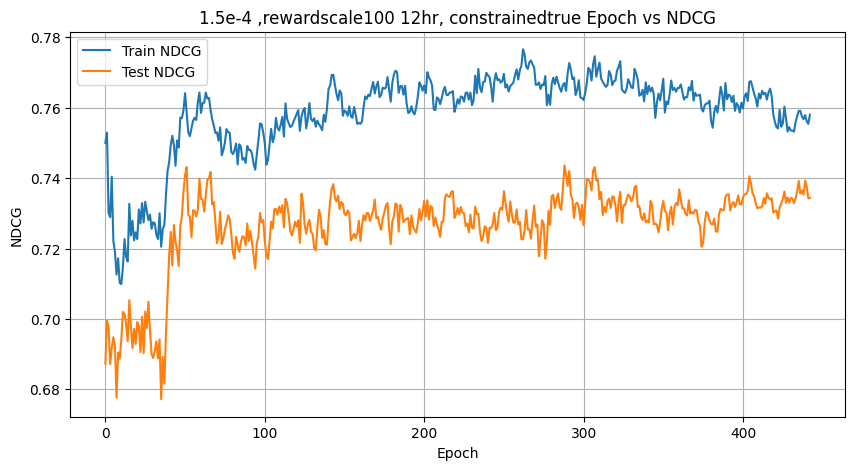

In [64]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_35xlrsched_epochs700_rwdscl100_entropy0.00001_benchmark29thmay.e449'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr, constrainedtrue')

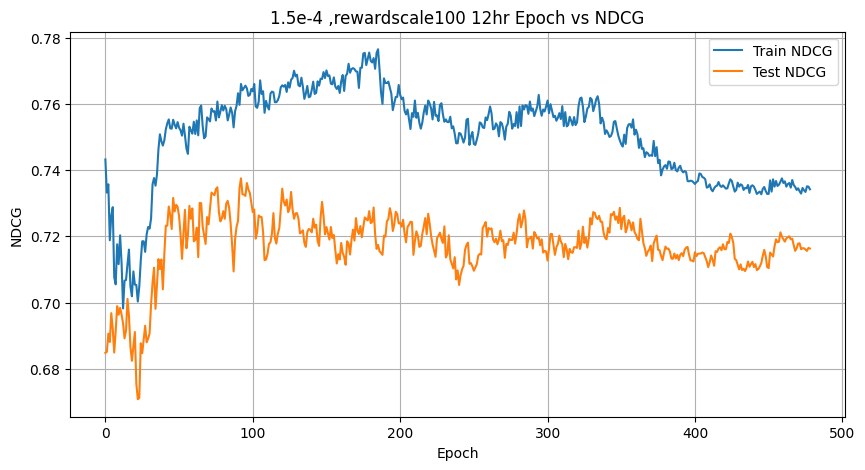

In [63]:
file_path = 'plot_files/PPORank_FYP_lr1.5e-4_50xlrsched_epochs700_rwdscl100_benchmark29thmay.e450'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 ,rewardscale100 12hr')

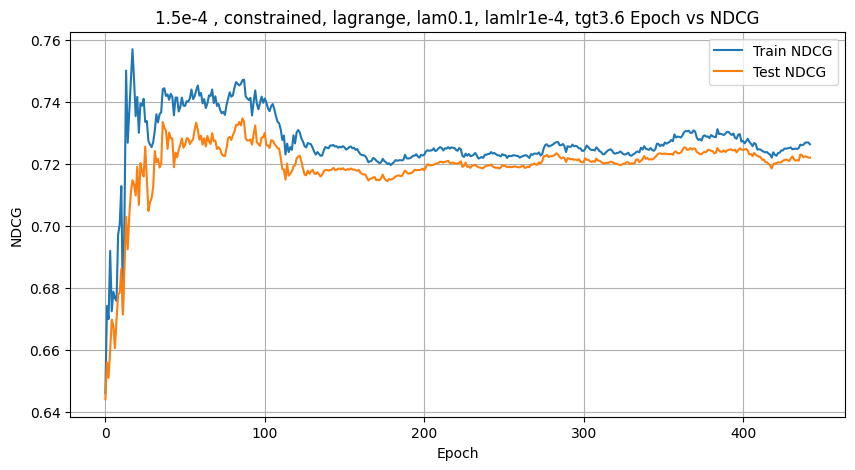

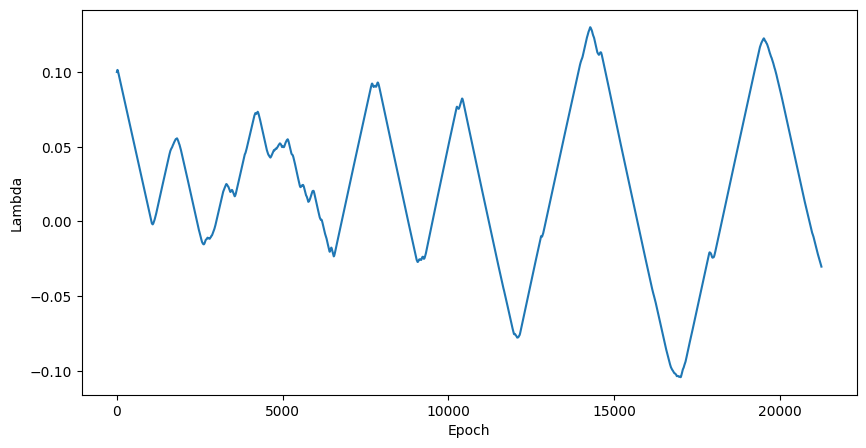

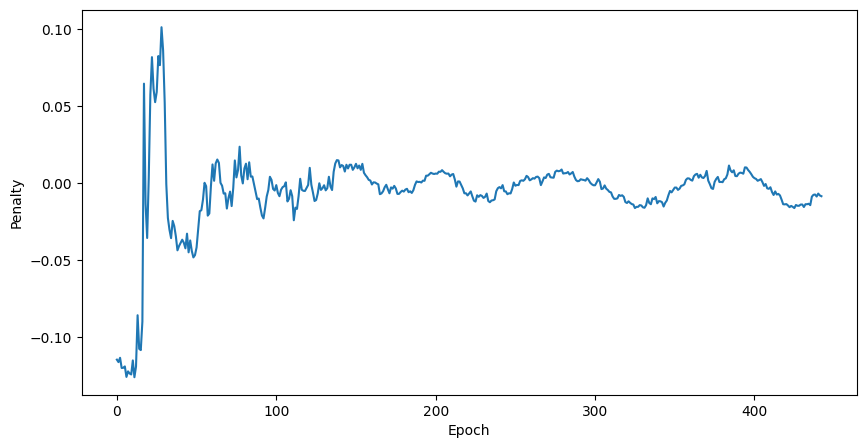

In [71]:
file_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_constr_lagrproper_rwdscl1_lagrloss_lam0.1_lamlr1e-4_tgt3.6_CPU.e447'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 , constrained, lagrange, lam0.1, lamlr1e-4, tgt3.6')

lamb_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_constr_lagrproper_rwdscl1_lagrloss_lam0.1_lamlr1e-4_tgt3.6_CPU.o447'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)


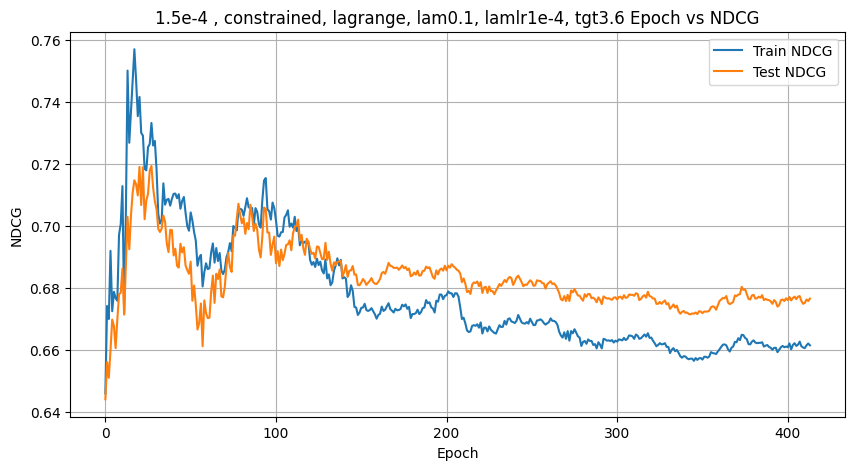

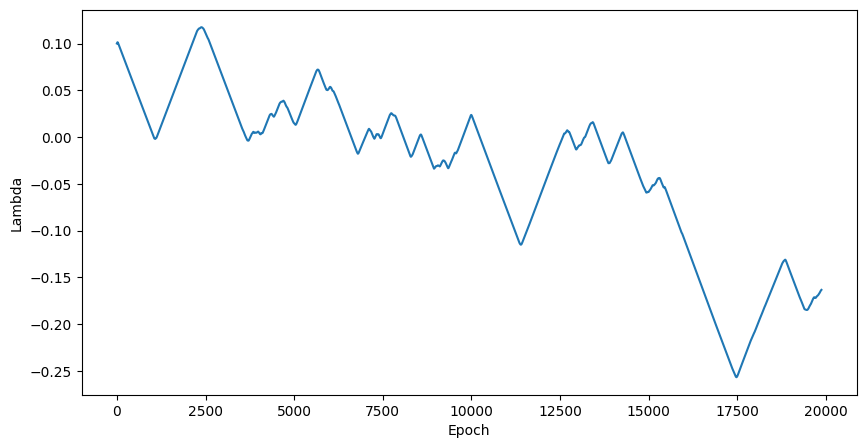

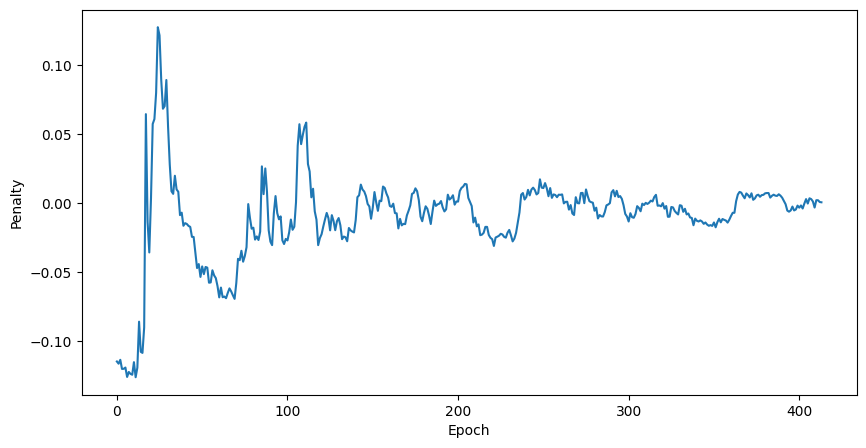

In [72]:
file_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_constr_lagrproper_rwdscl1_lagrloss_lam0.1_lamlr1e-4_tgt3.6.e421'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 , constrained, lagrange, lam0.1, lamlr1e-4, tgt3.6')

lamb_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_constr_lagrproper_rwdscl1_lagrloss_lam0.1_lamlr1e-4_tgt3.6.o421'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)


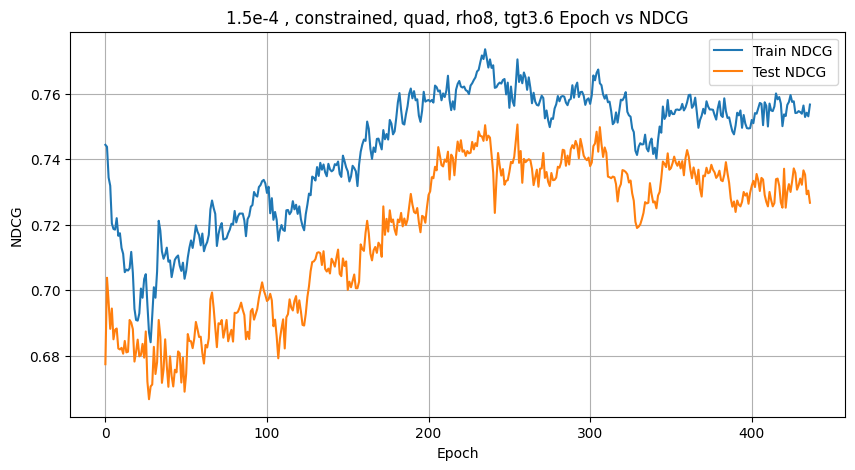

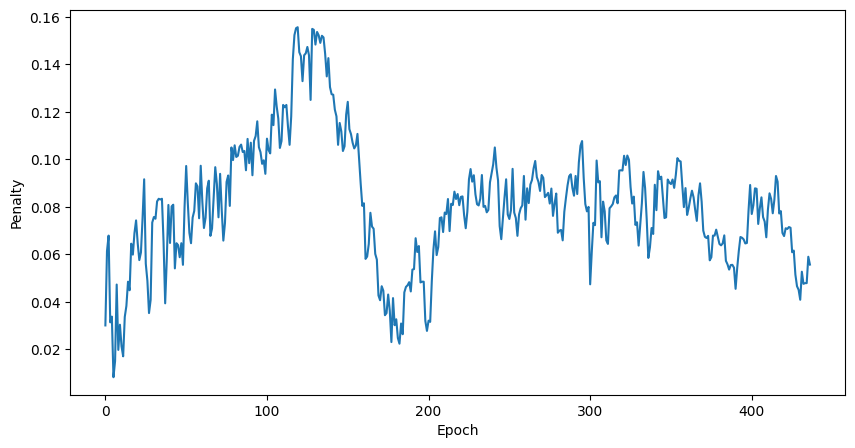

In [75]:
file_path = 'constrained_plots/quad/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_constr_quadloss_rho8_tgtpen3.6.e448'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 , constrained, quad, rho8, tgt3.6')

lamb_path = 'constrained_plots/quad/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_constr_quadloss_rho8_tgtpen3.6.o448'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)


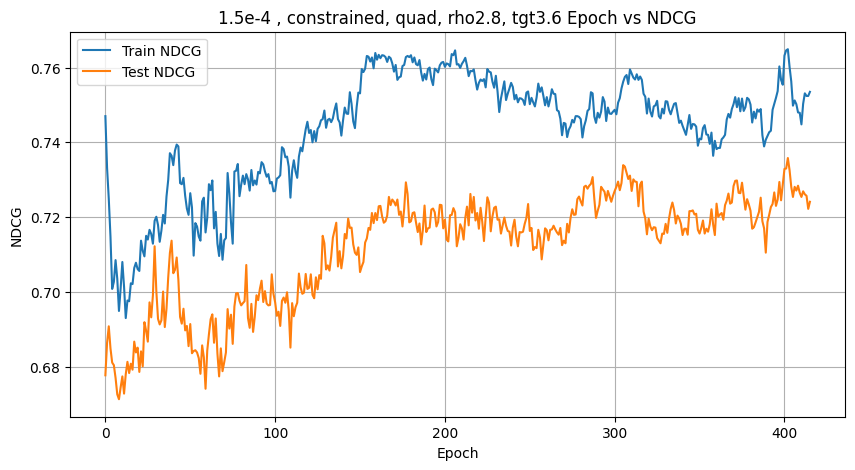

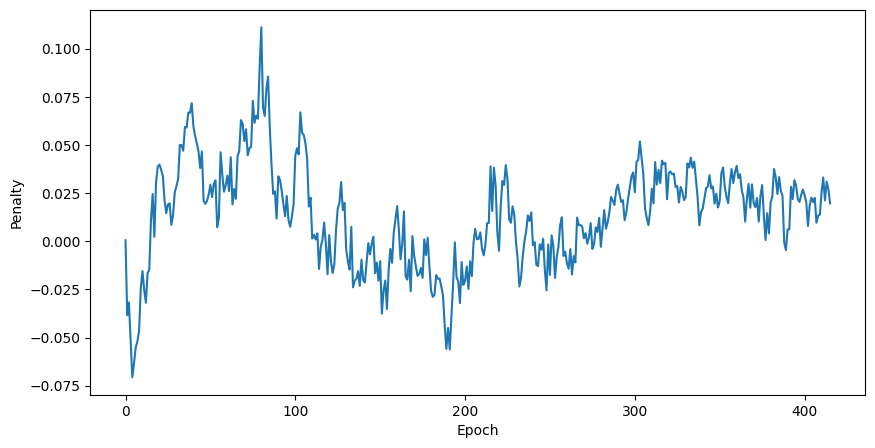

In [77]:
file_path = 'constrained_plots/quad/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_constr_rwdscl1_quadloss_rho2.8_tgtpen3.6.e422'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 , constrained, quad, rho2.8, tgt3.6')

lamb_path = 'constrained_plots/quad/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_constr_rwdscl1_quadloss_rho2.8_tgtpen3.6.o422'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)

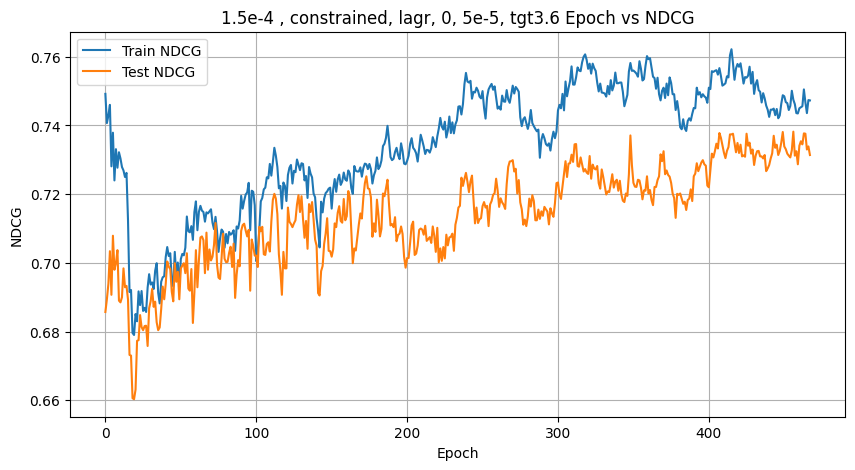

0.0011

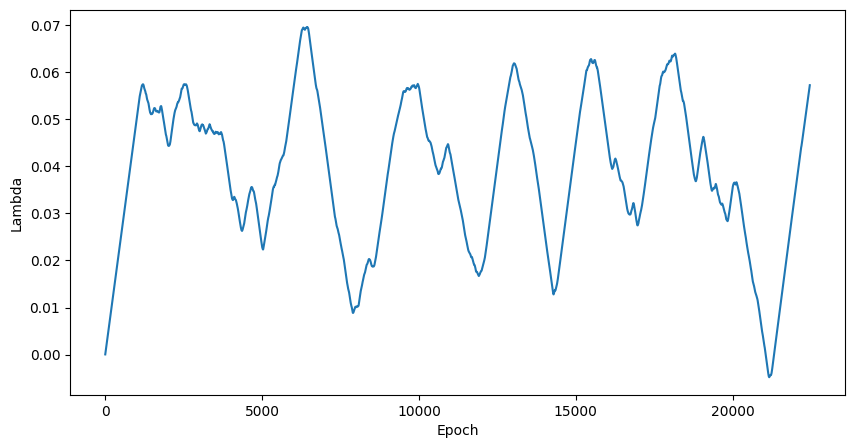

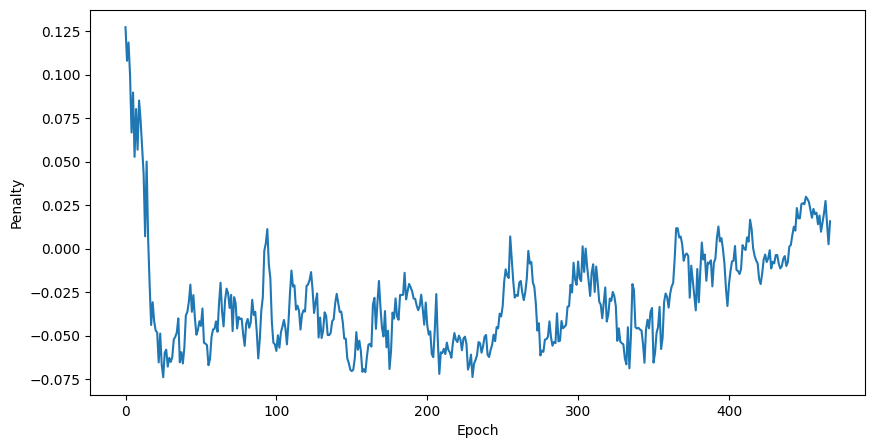

In [84]:
file_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_20xlrsched_epochs700_rwdscl1_constr_lagrloss_lam0_lamlr5e-5_tgt3.6.e553'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 , constrained, lagr, 0, 5e-5, tgt3.6')

lamb_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_20xlrsched_epochs700_rwdscl1_constr_lagrloss_lam0_lamlr5e-5_tgt3.6.o553'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)

pens[440]

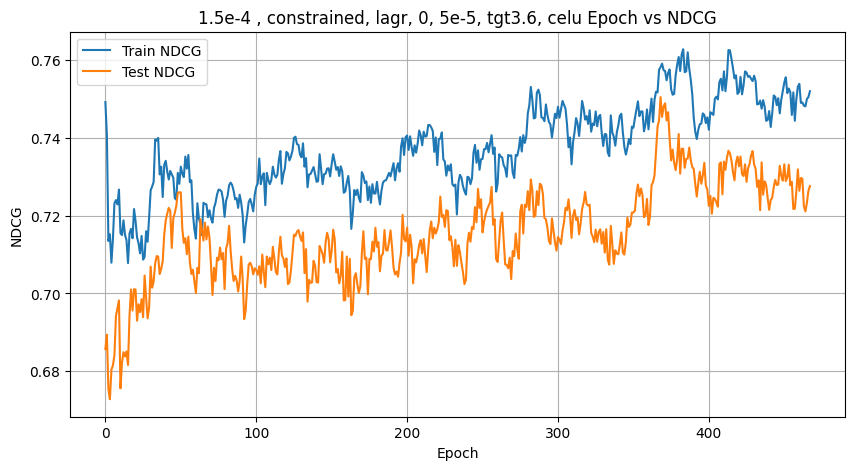

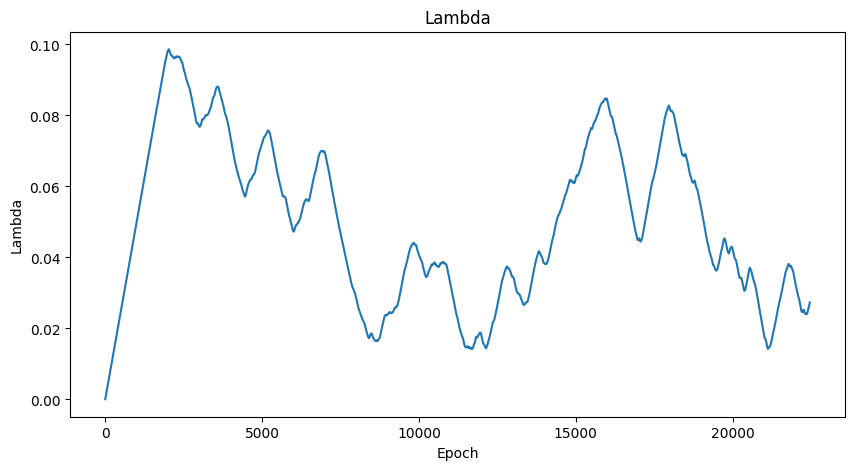

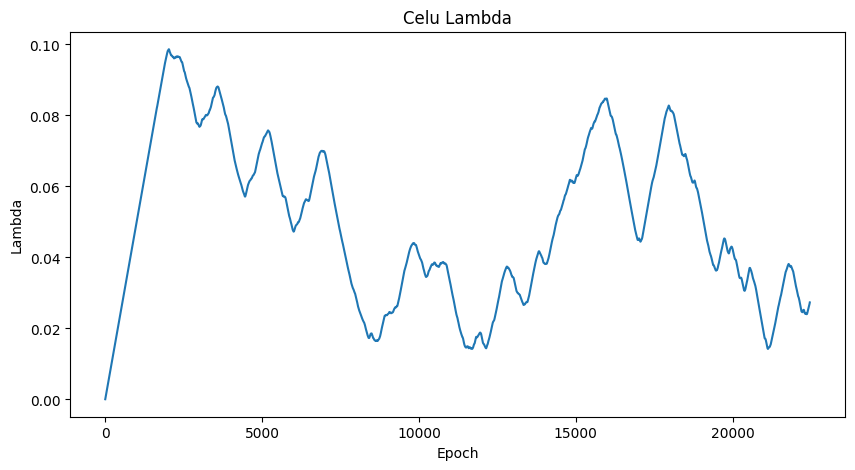

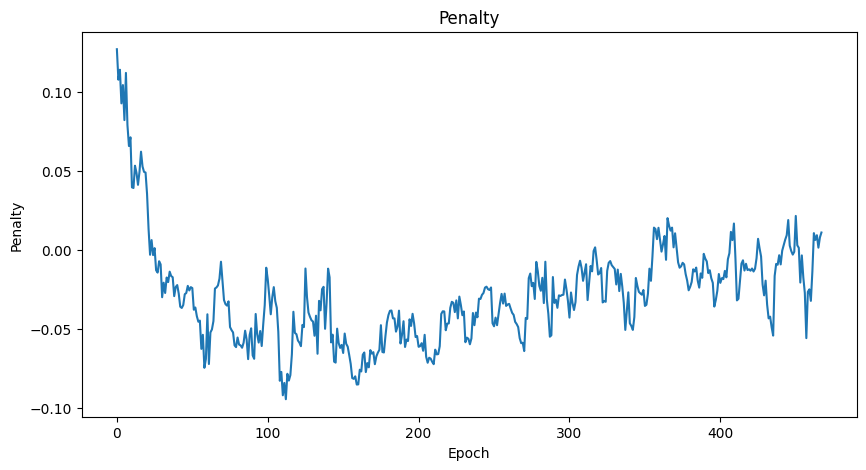

In [92]:
file_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_20xlrsched_epochs700_rwdscl1_constr_lagrloss_withcelualpha0.001_lam0_lamlr5e-5_tgt3.6.e557'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 , constrained, lagr, 0, 5e-5, tgt3.6, celu')

lamb_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_20xlrsched_epochs700_rwdscl1_constr_lagrloss_withcelualpha0.001_lam0_lamlr5e-5_tgt3.6.o557'
lambdas, celu_lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.title('Lambda')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.title('Celu Lambda')
plt.plot(celu_lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.title('Penalty')
plt.plot(pens)

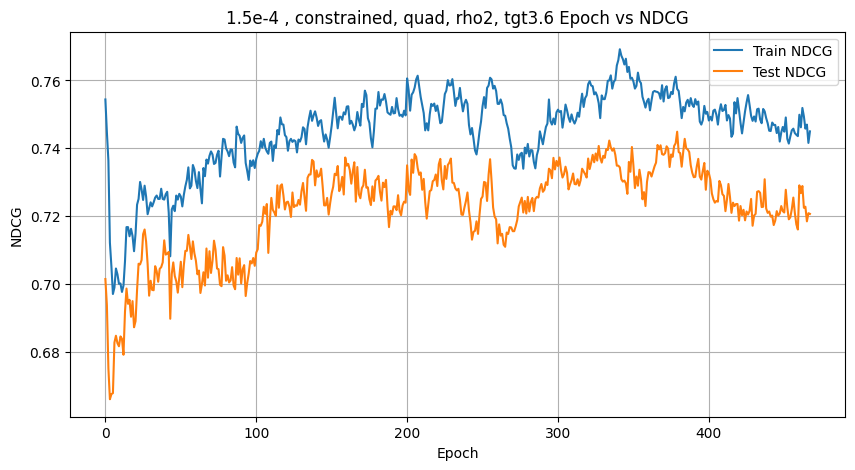

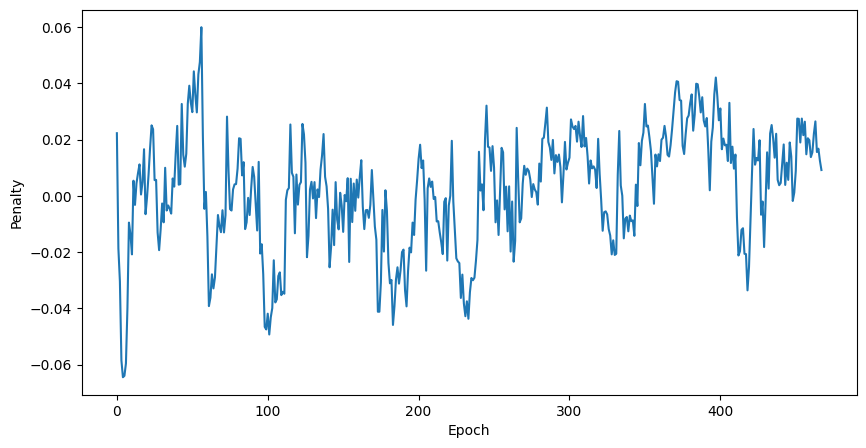

In [100]:
file_path = 'constrained_plots/quad/PPORank_FYP_lr1.5e-4_20xlrsched_epochs700_rwdscl1_constr_quadloss_rho2_tgt3.6.e622'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 , constrained, quad, rho2, tgt3.6')

lamb_path = 'constrained_plots/quad/PPORank_FYP_lr1.5e-4_20xlrsched_epochs700_rwdscl1_constr_quadloss_rho2_tgt3.6.o622'
lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.plot(pens)

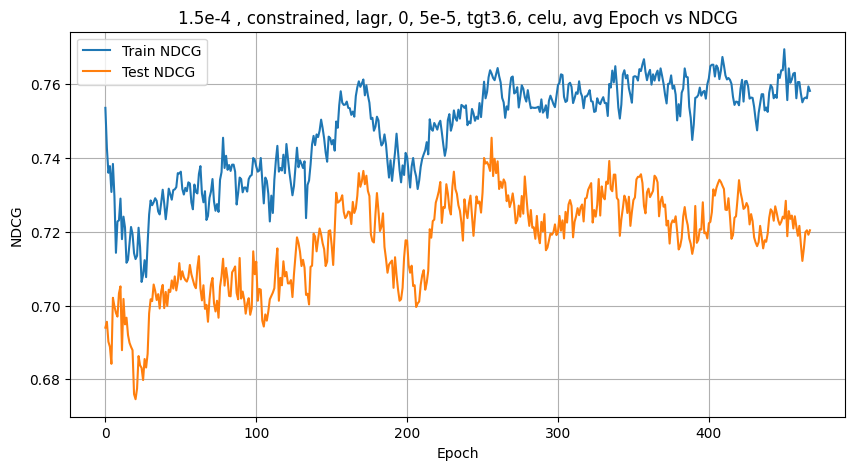

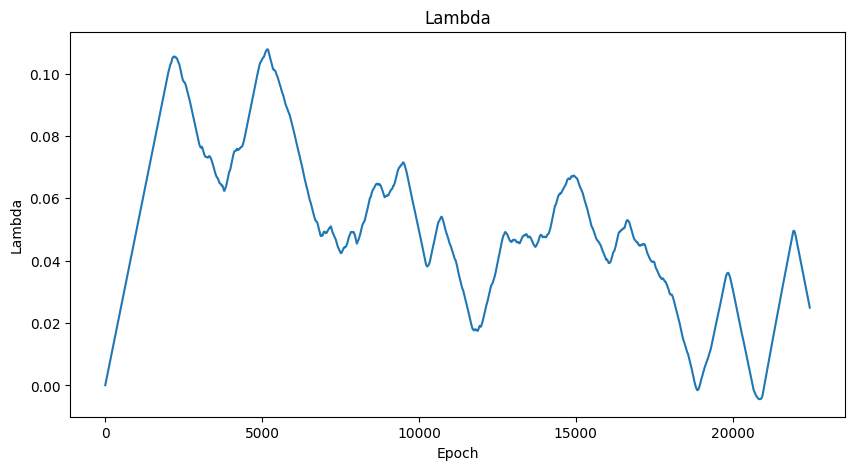

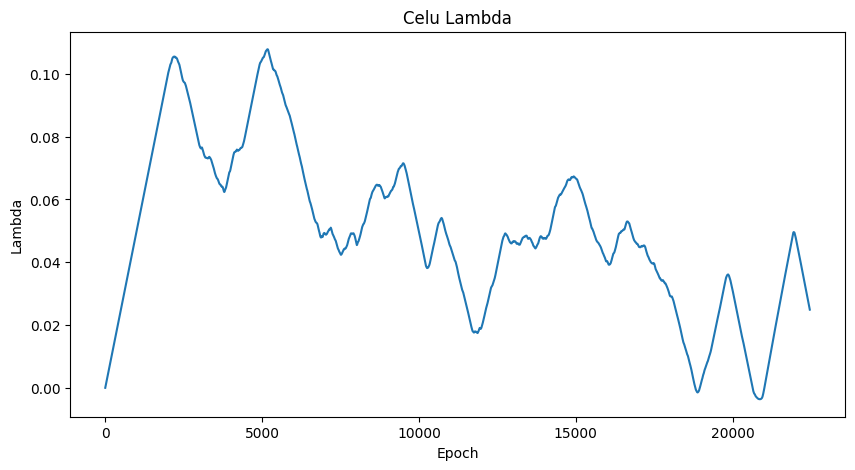

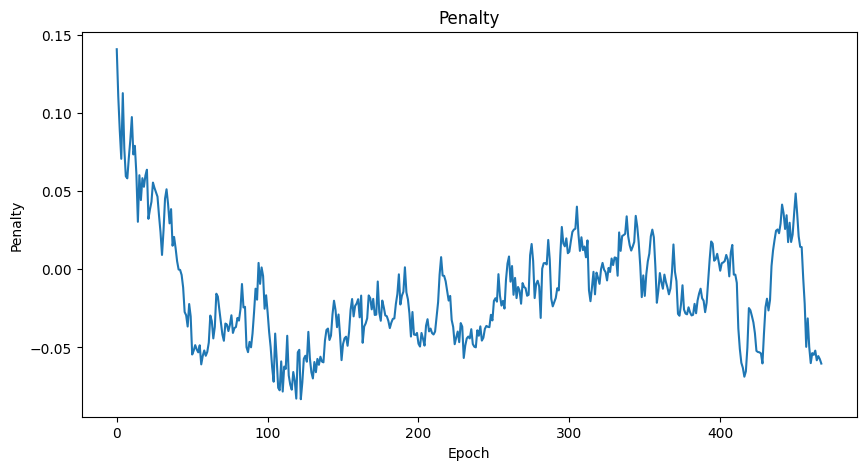

In [97]:
file_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_20xlrsched_epochs700_rwdscl1_constr_lagrloss_withcelu_avglosspenlamupdate_lam0_lamlr5e-5_tgt3.6.e640'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 , constrained, lagr, 0, 5e-5, tgt3.6, celu, avg')

lamb_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_20xlrsched_epochs700_rwdscl1_constr_lagrloss_withcelu_avglosspenlamupdate_lam0_lamlr5e-5_tgt3.6.o640'
lambdas, celu_lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.title('Lambda')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.title('Celu Lambda')
plt.plot(celu_lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.title('Penalty')
plt.plot(pens)



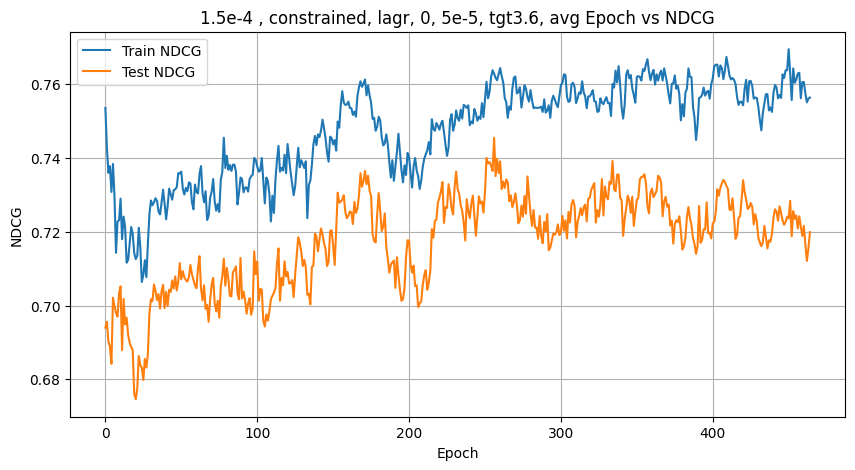

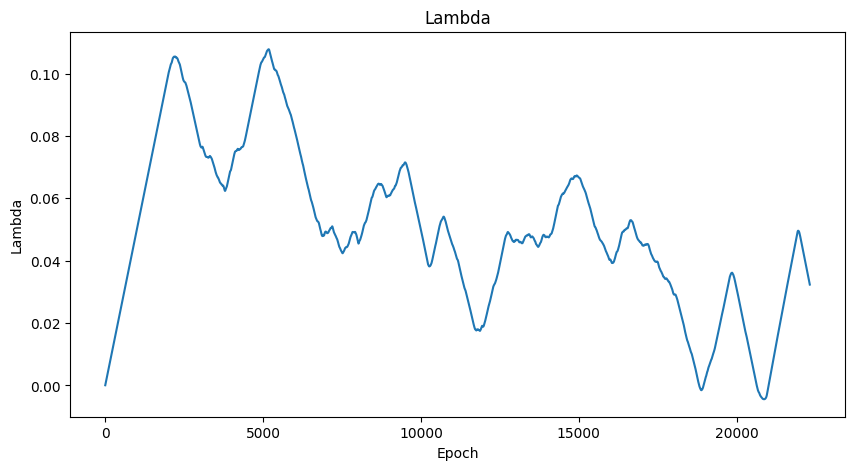

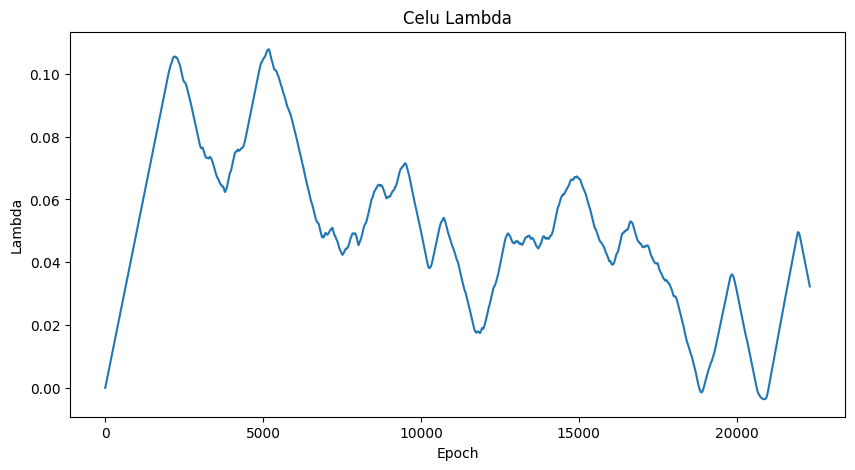

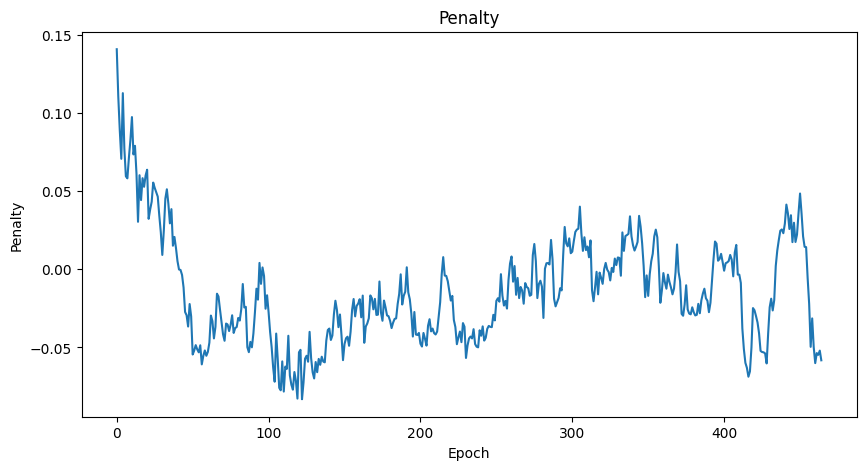

In [99]:
file_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_20xlrsched_epochs700_rwdscl1_constr_lagrloss_avglosspenlamupdate_lam0_lamlr5e-5_tgt3.6.e641'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 , constrained, lagr, 0, 5e-5, tgt3.6, avg')

lamb_path = 'constrained_plots/lagrange/PPORank_FYP_lr1.5e-4_20xlrsched_epochs700_rwdscl1_constr_lagrloss_avglosspenlamupdate_lam0_lamlr5e-5_tgt3.6.o641'
lambdas, celu_lambdas, pens = parse_lambda(lamb_path)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.title('Lambda')
plt.plot(lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Lambda')
plt.xlabel('Epoch')
plt.title('Celu Lambda')
plt.plot(celu_lambdas)

plt.figure(figsize=(10, 5))
plt.ylabel('Penalty')
plt.xlabel('Epoch')
plt.title('Penalty')
plt.plot(pens)





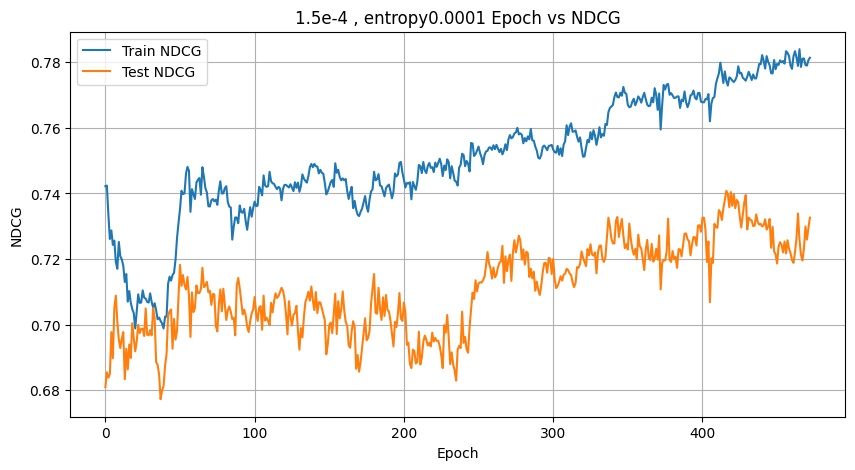

In [101]:
file_path = 'rankings/PPORank_FYP_lr1.5e-4_15xlrsched_epochs700_rwdscl100_entropy0.0001_benchmark30thmay.e552'
epochs, train_ndcgs, test_ndcgs = parse_log_file(file_path)
plot_ndcgs(epochs, train_ndcgs, test_ndcgs, '1.5e-4 , entropy0.0001')
